<a href="https://colab.research.google.com/github/degru82/my-jupyter-notebooks/blob/main/2021/Play_with_GeoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd

In [ ]:
import requests

# 1-각종 기본정보 다운로드하기

----
## 1.1-행정동(통계청/행자부) 코드

In [ ]:
# 행정동 코드 매핑 정보
distcd_df = pd.read_excel('https://data.seoul.go.kr/together/statbook/fileDownload.do?cotCd=999&filename=%ED%96%89%EC%A0%95%EB%8F%99%EC%BD%94%EB%93%9C_%EB%A7%A4%ED%95%91%EC%A0%95%EB%B3%B4_2018.xlsx&mnuSrl=1&mnuNm=%ED%85%8C%EC%8A%A4%ED%8A%B81&mnuFg=C&upMnuSrl=1')
distcd_df.drop(index=[0], inplace=True)
distcd_df


# 7자리냐 8자리냐에 따라 코드가 달라짐에 유의!

,통계청행정동코드,행자부행정동코드,시도명,시군구명,행정동명
1,1101053,11110530,서울,종로구,사직동
2,1101054,11110540,서울,종로구,삼청동
3,1101055,11110550,서울,종로구,부암동
4,1101056,11110560,서울,종로구,평창동
5,1101057,11110570,서울,종로구,무악동
...,...,...,...,...,...
420,1125070,11740690,서울,강동구,둔촌1동
421,1125071,11740700,서울,강동구,둔촌2동
422,1125072,11740570,서울,강동구,암사1동
423,1125073,11740610,서울,강동구,천호2동


----
## 1.2-읍면동 단위의 SHP 파일 다운로드

In [ ]:
# 읍면동EMD shape 정보를 가져옵니다
shp_url = 'http://www.gisdeveloper.co.kr/download/admin_shp/EMD_202101.zip'


In [ ]:
shape_zip = requests.get(shp_url)

In [ ]:
with open('korea_shp.zip', 'wb') as f:
    f.write(shape_zip.content)

In [ ]:
from zipfile import ZipFile

shp_data = ZipFile('korea_shp.zip').extractall()

In [ ]:
shp_dataframe = gpd.read_file('korea_shp.zip', encoding='euc-kr')

In [ ]:
shape_data = gpd.read_file(shp_url)

In [ ]:
shape_data.head()

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,42110101,Bongui-dong,b'\xba\xc0\xc0\xc7\xb5\xbf',"POLYGON ((1020498.164 1987458.238, 1020486.907..."
1,42110102,Yoseon-dong,b'\xbf\xe4\xbc\xb1\xb5\xbf',"POLYGON ((1019860.036 1986977.936, 1019862.394..."
2,42110103,Nagwon-dong,b'\xb3\xab\xbf\xf8\xb5\xbf',"POLYGON ((1019635.000 1986381.326, 1019566.366..."
3,42110104,Jungangno 1(il)-ga,b'\xc1\xdf\xbe\xd3\xb7\xce1\xb0\xa1',"POLYGON ((1020217.642 1987072.283, 1020190.311..."
4,42110105,Jungangno 2(i)-ga,b'\xc1\xdf\xbe\xd3\xb7\xce2\xb0\xa1',"POLYGON ((1019733.606 1986437.275, 1019725.206..."


In [ ]:
shp_dataframe.head()

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,42110101,Bongui-dong,봉의동,"POLYGON ((1020498.164 1987458.238, 1020486.907..."
1,42110102,Yoseon-dong,요선동,"POLYGON ((1019860.036 1986977.936, 1019862.394..."
2,42110103,Nagwon-dong,낙원동,"POLYGON ((1019635.000 1986381.326, 1019566.366..."
3,42110104,Jungangno 1(il)-ga,중앙로1가,"POLYGON ((1020217.642 1987072.283, 1020190.311..."
4,42110105,Jungangno 2(i)-ga,중앙로2가,"POLYGON ((1019733.606 1986437.275, 1019725.206..."


In [ ]:
shp_df = shp_dataframe

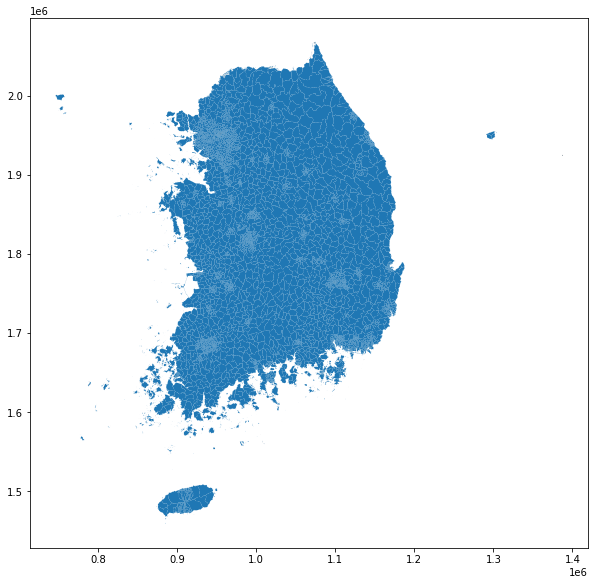

In [ ]:
shp_df.plot(figsize=(10, 10))

In [ ]:
shp_df.EMD_CD.unique()

array(['42110101', '42110102', '42110103', ..., '43800340', '43800350',
       '43800360'], dtype=object)

In [ ]:
GANGNAMGU = '11680'

located_in_gangnam = shp_df.EMD_CD.str.startswith(GANGNAMGU)

gangnam_df = shp_df[located_in_gangnam]
gangnam_df

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
3319,11680101,Yeoksam-dong,역삼동,"POLYGON ((960137.165 1945122.850, 960156.153 1..."
3320,11680103,Gaepo-dong,개포동,"POLYGON ((960034.647 1942684.838, 960350.575 1..."
3321,11680104,Cheongdam-dong,청담동,"POLYGON ((959934.756 1948388.974, 959935.285 1..."
3322,11680105,Samseong-dong,삼성동,"POLYGON ((961603.398 1947396.381, 961603.601 1..."
3323,11680106,Daechi-dong,대치동,"POLYGON ((961897.407 1945756.315, 961897.674 1..."
3324,11680107,Sinsa-dong,신사동,"MULTIPOLYGON (((957750.899 1946531.970, 957539..."
3325,11680108,Nonhyeon-dong,논현동,"POLYGON ((959462.169 1946535.462, 959494.383 1..."
3326,11680110,Apgujeong-dong,압구정동,"POLYGON ((957365.670 1948406.971, 957392.998 1..."
3327,11680111,Segok-dong,세곡동,"POLYGON ((966663.978 1941062.691, 966675.011 1..."
3328,11680112,Jagok-dong,자곡동,"POLYGON ((964967.157 1942954.269, 964969.056 1..."


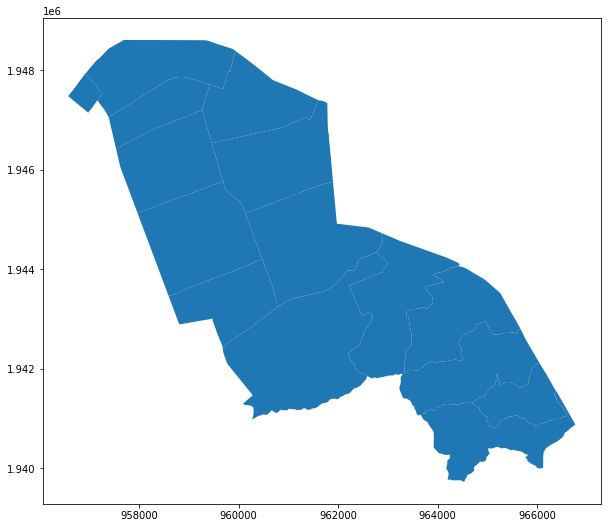

In [ ]:
gangnam_df.plot(figsize=(10, 10))

In [ ]:
CITYCODE__SEOUL = '11'
CITYCODE__KYUNGKI = '41'

is_in_seoul = shp_df.EMD_CD.str.startswith(CITYCODE__SEOUL)
is_in_kyungki = shp_df.EMD_CD.str.startswith(CITYCODE__KYUNGKI)

around_seoul_df = shp_df[(is_in_seoul) | (is_in_kyungki)]

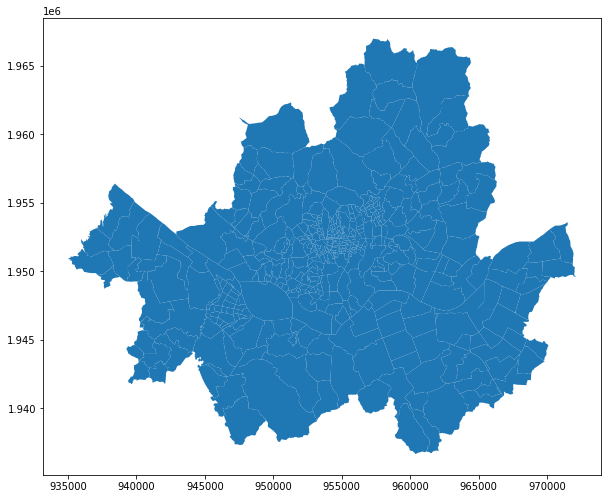

In [ ]:
only_seoul_df = shp_df[is_in_seoul]
only_seoul_df.plot(figsize=(10, 10))

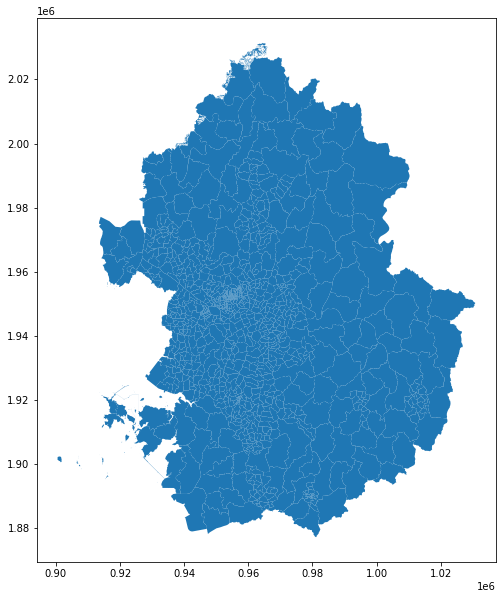

In [ ]:
around_seoul_df.plot(figsize=(10, 10))

----
## 1.3-서울시 생활이동 데이터

In [ ]:
post_body = {
	"infId": "DOWNLOAD",
	"infSeq": "2",
	"seqNo": "",
	"seq": "202108"
}

post_url = 'https://datafile.seoul.go.kr/bigfile/iot/inf/nio_download.do?&useCache=false'

In [ ]:
seoul_daily_mobility = requests.post(post_url, data=post_body)

In [ ]:
with open('seoul_daily_move.zip', 'wb') as f:
    f.write(seoul_daily_mobility.content)

In [ ]:
!unzip seoul_daily_move.zip

Archive:  seoul_daily_move.zip
  inflating: ьГЭэЩЬьЭ┤ыПЩ_эЦЙьаХыПЩ_2021.08_18ьЛЬ.csv  
  inflating: ьГЭэЩЬьЭ┤ыПЩ_эЦЙьаХыПЩ_2021.08_05ьЛЬ.csv  
  inflating: ьГЭэЩЬьЭ┤ыПЩ_эЦЙьаХыПЩ_2021.08_08ьЛЬ.csv  
  inflating: ьГЭэЩЬьЭ┤ыПЩ_эЦЙьаХыПЩ_2021.08_04ьЛЬ.csv  
  inflating: ьГЭэЩЬьЭ┤ыПЩ_эЦЙьаХыПЩ_2021.08_09ьЛЬ.csv  
  inflating: ьГЭэЩЬьЭ┤ыПЩ_эЦЙьаХыПЩ_2021.08_19ьЛЬ.csv  
  inflating: ьГЭэЩЬьЭ┤ыПЩ_эЦЙьаХыПЩ_2021.08_20ьЛЬ.csv  
  inflating: ьГЭэЩЬьЭ┤ыПЩ_эЦЙьаХыПЩ_2021.08_00ьЛЬ.csv  
  inflating: ьГЭэЩЬьЭ┤ыПЩ_эЦЙьаХыПЩ_2021.08_15ьЛЬ.csv  
  inflating: ьГЭэЩЬьЭ┤ыПЩ_эЦЙьаХыПЩ_2021.08_03ьЛЬ.csv  
  inflating: ьГЭэЩЬьЭ┤ыПЩ_эЦЙьаХыПЩ_2021.08_10ьЛЬ.csv  
  inflating: ьГЭэЩЬьЭ┤ыПЩ_эЦЙьаХыПЩ_2021.08_14ьЛЬ.csv  
  inflating: ьГЭэЩЬьЭ┤ыПЩ_эЦЙьаХыПЩ_2021.08_02ьЛЬ.csv  
  inflating: ьГЭэЩЬьЭ┤ыПЩ_эЦЙьаХыПЩ_2021.08_01ьЛЬ.csv  
  inflating: ьГЭэЩЬьЭ┤ыПЩ_эЦЙьаХыПЩ_2021.08_13ьЛЬ.csv  
  inflating: ьГЭэЩЬьЭ┤ыПЩ_эЦЙьаХыПЩ_2021.08_11ьЛЬ.csv  
  inflating: ьГЭэЩЬьЭ┤ыПЩ_эЦЙьаХыПЩ_2021.08_21ьЛЬ.csv  
  inflating: ьГЭэ

In [ ]:
!ls -al

total 11198288
drwxr-xr-x 1 root root       4096 Nov  7 07:10 .
drwxr-xr-x 1 root root       4096 Nov  7 01:43 ..
-rw-r--r-- 1 root root   31151688 Nov  7 01:52 choropleth.html
drwxr-xr-x 4 root root       4096 Nov  1 13:34 .config
-rw-r--r-- 1 root root    2124127 Nov  7 01:50 domn_legal.zip
-rw-r--r-- 1 root root    6190366 Oct 28 10:10 KIKcd_B.20211102
-rw-r--r-- 1 root root     762201 Oct 28 10:16 KIKcd_B.20211102.xlsx
-rw-r--r-- 1 root root    1162462 Oct 28 10:10 KIKcd_H.20211102
-rw-r--r-- 1 root root     145440 Oct 28 10:18 KIKcd_H.20211102.xlsx
-rw-r--r-- 1 root root    3588255 Oct 28 10:10 KIKmix.20211102
-rw-r--r-- 1 root root     872249 Oct 28 10:20 KIKmix.20211102.xlsx
-rw-r--r-- 1 root root   39254629 Nov  7 07:05 korea_shp.zip
drwxr-xr-x 1 root root       4096 Nov  1 13:35 sample_data
-rw-r--r-- 1 root root   70467302 Oct 12 15:54 seoul_daily_move_2021.08_00.csv
-rw-r--r-- 1 root root   44219971 Oct 12 15:54 seoul_daily_move_2021.08_01.csv
-rw-r--r-- 1 root root   282210

In [ ]:
import os

for hr in range(24):
    hr_str = str(hr).zfill(2)
    oldname = 'ьГЭэЩЬьЭ┤ыПЩ_эЦЙьаХыПЩ_2021.08_' + hr_str + 'ьЛЬ.csv'
    newname = 'seoul_daily_move_2021.08_' + hr_str + '.csv'

    os.rename(oldname, newname)
    print(hr_str)



00
01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [ ]:
!ls -la

total 6260708
drwxr-xr-x 1 root root       4096 Nov  7 07:10 .
drwxr-xr-x 1 root root       4096 Nov  7 01:43 ..
-rw-r--r-- 1 root root   31151688 Nov  7 01:52 choropleth.html
drwxr-xr-x 4 root root       4096 Nov  1 13:34 .config
-rw-r--r-- 1 root root    2124127 Nov  7 01:50 domn_legal.zip
-rw-r--r-- 1 root root    6190366 Oct 28 10:10 KIKcd_B.20211102
-rw-r--r-- 1 root root     762201 Oct 28 10:16 KIKcd_B.20211102.xlsx
-rw-r--r-- 1 root root    1162462 Oct 28 10:10 KIKcd_H.20211102
-rw-r--r-- 1 root root     145440 Oct 28 10:18 KIKcd_H.20211102.xlsx
-rw-r--r-- 1 root root    3588255 Oct 28 10:10 KIKmix.20211102
-rw-r--r-- 1 root root     872249 Oct 28 10:20 KIKmix.20211102.xlsx
-rw-r--r-- 1 root root   39254629 Nov  7 07:05 korea_shp.zip
drwxr-xr-x 1 root root       4096 Nov  1 13:35 sample_data
-rw-r--r-- 1 root root   70467302 Oct 12 15:54 seoul_daily_move_2021.08_00.csv
-rw-r--r-- 1 root root   44219971 Oct 12 15:54 seoul_daily_move_2021.08_01.csv
-rw-r--r-- 1 root root   2822108

In [ ]:
# df_list_day_move = []
# for hr in range(24):
#     hr_str = str(hr).zfill(2)
#     df_list_day_move.append(
#         pd.read_csv(f'seoul_daily_move_2021.08_{hr_str}.csv', encoding='euc-kr')
#     )


----
# 2-인구 이동 파악

----
## 2.1-2021/8 00시경 강남에서(from) 이동하는 인구 패턴

In [ ]:
mov_df = pd.read_csv('seoul_daily_move_2021.08_00.csv', encoding='euc-kr')

In [ ]:
mov_df.head(100)

,대상연월,요일,도착시간,출발 행정동 코드,도착 행정동 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202108,일,0,1117069,3115059,F,35,EE,10,3.04
1,202108,일,0,1109065,1109060,F,20,EH,20,*
2,202108,일,0,1125074,1125074,M,50,HH,10,6.56
3,202108,일,0,1107072,1108058,M,55,HE,10,3.29
4,202108,일,0,1125073,1101061,F,25,EE,20,*
...,...,...,...,...,...,...,...,...,...,...
95,202108,일,0,3109177,1124051,M,60,EH,30,3.51
96,202108,일,0,1123079,3104266,M,10,WH,10,13.26
97,202108,일,0,1105067,3102160,M,30,EH,20,*
98,202108,일,0,1122067,2304063,F,45,EH,40,3.37


In [ ]:
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618105 entries, 0 to 1618104
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   대상연월         1618105 non-null  int64 
 1   요일           1618105 non-null  object
 2   도착시간         1618105 non-null  int64 
 3   출발 행정동 코드    1618105 non-null  int64 
 4   도착 행정동 코드    1618105 non-null  int64 
 5   성별           1618105 non-null  object
 6   나이           1618105 non-null  int64 
 7   이동유형         1618105 non-null  object
 8   평균 이동 시간(분)  1618105 non-null  int64 
 9   이동인구(합)      1618105 non-null  object
dtypes: int64(6), object(4)
memory usage: 123.5+ MB


In [ ]:
mov_df.describe()

,대상연월,도착시간,출발 행정동 코드,도착 행정동 코드,나이,평균 이동 시간(분)
count,1618105.0,1618105.0,1.618105e+06,1.618105e+06,1.618105e+06,1.618105e+06
mean,202108.0,0.0,1.298499e+06,1.445088e+06,3.579227e+01,3.348517e+01
std,0.0,0.0,6.556524e+05,7.801417e+05,1.457170e+01,3.119244e+01
min,202108.0,0.0,2.100000e+04,2.100000e+04,0.000000e+00,1.000000e+01
25%,202108.0,0.0,1.108071e+06,1.109072e+06,2.500000e+01,1.000000e+01
50%,202108.0,0.0,1.117056e+06,1.118051e+06,3.500000e+01,2.000000e+01
75%,202108.0,0.0,1.123065e+06,1.124069e+06,4.500000e+01,4.000000e+01
max,202108.0,0.0,3.138041e+06,3.138041e+06,8.000000e+01,8.500000e+02


In [ ]:
max(mov_df['이동인구(합)'])

'99.62'

In [ ]:
mov_df['depart_emd_cd'] = mov_df['출발 행정동 코드'].astype('str')
mov_df['arrive_emd_cd'] = mov_df['도착 행정동 코드'].astype('str')
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618105 entries, 0 to 1618104
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   대상연월           1618105 non-null  int64 
 1   요일             1618105 non-null  object
 2   도착시간           1618105 non-null  int64 
 3   출발 행정동 코드      1618105 non-null  int64 
 4   도착 행정동 코드      1618105 non-null  int64 
 5   성별             1618105 non-null  object
 6   나이             1618105 non-null  int64 
 7   이동유형           1618105 non-null  object
 8   평균 이동 시간(분)    1618105 non-null  int64 
 9   이동인구(합)        1618105 non-null  object
 10  depart_emd_cd  1618105 non-null  object
 11  arrive_emd_cd  1618105 non-null  object
dtypes: int64(6), object(6)
memory usage: 148.1+ MB


In [ ]:
GANGNAMGU_CD = '11230'

gangnam_df = mov_df[(mov_df['depart_emd_cd'].str.startswith(GANGNAMGU_CD) | (mov_df['depart_emd_cd'].str.startswith(GANGNAMGU_CD)))]
gangnam_df = gangnam_df[gangnam_df['이동인구(합)'] != '*']
gangnam_df['count'] = gangnam_df['이동인구(합)'].astype('float')
gangnam_df

,대상연월,요일,도착시간,출발 행정동 코드,도착 행정동 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),depart_emd_cd,arrive_emd_cd,count
40,202108,일,0,1123080,1123072,M,50,WH,10,3.29,1123080,1123072,3.29
79,202108,일,0,1123078,1124075,M,40,EH,10,3.02,1123078,1124075,3.02
96,202108,일,0,1123079,3104266,M,10,WH,10,13.26,1123079,3104266,13.26
145,202108,일,0,1123064,1122067,F,25,EH,30,10.25,1123064,1122067,10.25
161,202108,일,0,1123052,1122057,M,20,EE,10,5.43,1123052,1122057,5.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617987,202108,토,0,1123052,3102165,F,45,WH,10,3.34,1123052,3102165,3.34
1618010,202108,토,0,1123063,1123072,M,40,WH,10,6.02,1123063,1123072,6.02
1618070,202108,토,0,1123080,1123080,M,55,HH,10,6.6,1123080,1123080,6.60
1618097,202108,토,0,1123059,1123065,F,40,WW,10,3.44,1123059,1123065,3.44


In [ ]:
gangnam_df[gangnam_df['arrive_emd_cd'] == '39000']

,대상연월,요일,도착시간,출발 행정동 코드,도착 행정동 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),depart_emd_cd,arrive_emd_cd,count
756557,202108,수,0,1123079,39000,F,40,EH,170,3.44,1123079,39000,3.44
794559,202108,수,0,1123052,39000,M,40,WE,150,3.02,1123052,39000,3.02
846744,202108,수,0,1123065,39000,M,45,WE,120,3.18,1123065,39000,3.18
872231,202108,수,0,1123067,39000,F,40,HE,110,3.47,1123067,39000,3.47
1286886,202108,금,0,1123080,39000,F,15,EE,130,4.04,1123080,39000,4.04
1314261,202108,금,0,1123076,39000,M,40,HE,220,3.01,1123076,39000,3.01
1418220,202108,토,0,1123065,39000,M,55,WE,130,3.26,1123065,39000,3.26


In [ ]:
gnam_outbd = gangnam_df.groupby(['depart_emd_cd', 'arrive_emd_cd'])['count'].agg([sum])
gnam_outbd

sum
depart_emd_cd arrive_emd_cd       
1123051       1101053        67.41
              1101054         6.05
              1101055         3.38
              1101056        27.43
              1101057         4.11
...                            ...
1123080       34000           8.90
              36000           6.46
              37000           3.14
              38000           3.28
              39000           4.04

[12852 rows x 1 columns]

----
## 2.2-통계청 코드로 기록된 출/도착지를 행자부 코드로 확장

[우리나라 행정구역 관련 코드 종류 및 상호 연결 방법](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=leonheart85&logNo=221085795006)

### TODO: 시간대별 동별 인구이동을 Inbound/Outbound로 나눠서, 이하의 버스 노선과 비교
- 목적은 광역/간선/지선의 버스 노선 디자인이 실 인구이동 패턴과 맞지 않음을 시각화

1. 시간대별 동별 인구이동을 표로 생성 (위에 일부 완료)
1. 동별 shape을 폴리곤 등으로 매핑
1. Choropleth 형태로 시각화
1. 이를 In-/Out-bound 및 동별/시간대별/노선별로 다각화

In [ ]:
distcd_df.head(3)

,통계청행정동코드,행자부행정동코드,시도명,시군구명,행정동명
1,1101053,11110530,서울,종로구,사직동
2,1101054,11110540,서울,종로구,삼청동
3,1101055,11110550,서울,종로구,부암동


In [ ]:
distcd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424 entries, 1 to 424
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   통계청행정동코드  424 non-null    object
 1   행자부행정동코드  424 non-null    object
 2   시도명       424 non-null    object
 3   시군구명      424 non-null    object
 4   행정동명      424 non-null    object
dtypes: object(5)
memory usage: 19.9+ KB


In [ ]:
distcd2_df = distcd_df.copy()
distcd2_df['stat_dist_cd'] = distcd2_df['통계청행정동코드'].astype('str')
distcd2_df['domn_dist_cd'] = distcd2_df['행자부행정동코드'].astype('str')

stat2domn_codes = distcd2_df.drop(columns=['통계청행정동코드', '행자부행정동코드', '시도명', '시군구명', '행정동명'])
stat2domn_codes

,stat_dist_cd,domn_dist_cd
1,1101053,11110530
2,1101054,11110540
3,1101055,11110550
4,1101056,11110560
5,1101057,11110570
...,...,...
420,1125070,11740690
421,1125071,11740700
422,1125072,11740570
423,1125073,11740610


In [ ]:
gnam_outbd_reset = gnam_outbd.reset_index()
gnam_outbd_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12852 entries, 0 to 12851
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   depart_emd_cd  12852 non-null  object 
 1   arrive_emd_cd  12852 non-null  object 
 2   sum            12852 non-null  float64
dtypes: float64(1), object(2)
memory usage: 301.3+ KB


In [ ]:
exp_gnam_outbd = pd.merge(
    gnam_outbd_reset,
    distcd2_df,
    how='left',
    left_on='arrive_emd_cd',
    right_on='stat_dist_cd'
)

exp_gnam_outbd.head(5)

,depart_emd_cd,arrive_emd_cd,sum,통계청행정동코드,행자부행정동코드,시도명,시군구명,행정동명,stat_dist_cd,domn_dist_cd
0,1123051,1101053,67.41,1101053,11110530,서울,종로구,사직동,1101053,11110530
1,1123051,1101054,6.05,1101054,11110540,서울,종로구,삼청동,1101054,11110540
2,1123051,1101055,3.38,1101055,11110550,서울,종로구,부암동,1101055,11110550
3,1123051,1101056,27.43,1101056,11110560,서울,종로구,평창동,1101056,11110560
4,1123051,1101057,4.11,1101057,11110570,서울,종로구,무악동,1101057,11110570


----
## 2.3-법정동 코드로 된 SHP와 연계하기 위해 행자부-법정동 코드 매핑

In [ ]:
shp_df.head()

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,42110101,Bongui-dong,봉의동,"POLYGON ((1020498.164 1987458.238, 1020486.907..."
1,42110102,Yoseon-dong,요선동,"POLYGON ((1019860.036 1986977.936, 1019862.394..."
2,42110103,Nagwon-dong,낙원동,"POLYGON ((1019635.000 1986381.326, 1019566.366..."
3,42110104,Jungangno 1(il)-ga,중앙로1가,"POLYGON ((1020217.642 1987072.283, 1020190.311..."
4,42110105,Jungangno 2(i)-ga,중앙로2가,"POLYGON ((1019733.606 1986437.275, 1019725.206..."


In [ ]:
shp_df[shp_df['EMD_KOR_NM']=='사직동']

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
199,42230121,Sajik-dong,사직동,"POLYGON ((1147909.534 1938608.216, 1147952.765..."
2805,26260109,Sajik-dong,사직동,"POLYGON ((1140567.390 1690466.852, 1140568.998..."
2902,11110115,Sajik-dong,사직동,"POLYGON ((952745.849 1953334.909, 952758.791 1..."
4531,44131104,Sajik-dong,사직동,"POLYGON ((968796.642 1867370.378, 968799.161 1..."
4844,43112101,Sajik-dong,사직동,"POLYGON ((998442.920 1849694.185, 998460.450 1..."


In [ ]:
type(shp_df.iloc[0]['EMD_CD']), shp_df.iloc[0]['EMD_CD']

(str, '42110101')

[행정동-법정동 코드 받는 방법](https://vlog.tion.co.kr/%ED%96%89%EC%A0%95%EB%8F%99%EC%BD%94%EB%93%9C%EC%A0%84%EC%B2%B4-%EB%B0%8F-%EB%B2%95%EC%A0%95%EB%8F%99-%ED%96%89%EC%A0%95%EB%8F%99%EC%BD%94%EB%93%9C-%EB%A7%A4%ED%95%91-%EC%9E%90%EB%A3%8C-%EB%B0%9B/)

In [ ]:
# https://www.mois.go.kr/cmm/fms/FileDown.do?atchFileId=FILE_001047557ROhEdd&fileSn=0
# domn_legal_codes_resp = requests.get('https://www.mois.go.kr/cmm/fms/FileDown.do?atchFileId=FILE_00101177bJe-iMh&fileSn=1')
domn_legal_codes_resp = requests.get('https://www.mois.go.kr/cmm/fms/FileDown.do?atchFileId=FILE_001047557ROhEdd&fileSn=0')

with open('domn_legal.zip', 'wb') as f:
    f.write(domn_legal_codes_resp.content)

!ls -al

total 6260708
drwxr-xr-x 1 root root       4096 Nov  7 07:10 .
drwxr-xr-x 1 root root       4096 Nov  7 01:43 ..
-rw-r--r-- 1 root root   31151688 Nov  7 01:52 choropleth.html
drwxr-xr-x 4 root root       4096 Nov  1 13:34 .config
-rw-r--r-- 1 root root    2124127 Nov  7 07:11 domn_legal.zip
-rw-r--r-- 1 root root    6190366 Oct 28 10:10 KIKcd_B.20211102
-rw-r--r-- 1 root root     762201 Oct 28 10:16 KIKcd_B.20211102.xlsx
-rw-r--r-- 1 root root    1162462 Oct 28 10:10 KIKcd_H.20211102
-rw-r--r-- 1 root root     145440 Oct 28 10:18 KIKcd_H.20211102.xlsx
-rw-r--r-- 1 root root    3588255 Oct 28 10:10 KIKmix.20211102
-rw-r--r-- 1 root root     872249 Oct 28 10:20 KIKmix.20211102.xlsx
-rw-r--r-- 1 root root   39254629 Nov  7 07:05 korea_shp.zip
drwxr-xr-x 1 root root       4096 Nov  1 13:35 sample_data
-rw-r--r-- 1 root root   70467302 Oct 12 15:54 seoul_daily_move_2021.08_00.csv
-rw-r--r-- 1 root root   44219971 Oct 12 15:54 seoul_daily_move_2021.08_01.csv
-rw-r--r-- 1 root root   2822108

In [ ]:
# import zipfile
# with zipfile.ZipFile('domn_legal.zip', 'r') as zip_ref:
#     zip_ref.extractall('domn_legal')
!unzip domn_legal.zip

Archive:  domn_legal.zip
replace KIKcd_B.20211102? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: KIKcd_B.20211102        
  inflating: KIKcd_B.20211102.xlsx   
  inflating: KIKcd_H.20211102        
  inflating: KIKcd_H.20211102.xlsx   
  inflating: KIKmix.20211102         
  inflating: KIKmix.20211102.xlsx    


In [ ]:
!ls -al


total 6260708
drwxr-xr-x 1 root root       4096 Nov  7 07:17 .
drwxr-xr-x 1 root root       4096 Nov  7 01:43 ..
-rw-r--r-- 1 root root   31151688 Nov  7 01:52 choropleth.html
drwxr-xr-x 4 root root       4096 Nov  1 13:34 .config
-rw-r--r-- 1 root root    2124127 Nov  7 07:11 domn_legal.zip
-rw-r--r-- 1 root root    6190366 Oct 28 10:10 KIKcd_B.20211102
-rw-r--r-- 1 root root     762201 Oct 28 10:16 KIKcd_B.20211102.xlsx
-rw-r--r-- 1 root root    1162462 Oct 28 10:10 KIKcd_H.20211102
-rw-r--r-- 1 root root     145440 Oct 28 10:18 KIKcd_H.20211102.xlsx
-rw-r--r-- 1 root root    3588255 Oct 28 10:10 KIKmix.20211102
-rw-r--r-- 1 root root     872249 Oct 28 10:20 KIKmix.20211102.xlsx
-rw-r--r-- 1 root root   39254629 Nov  7 07:05 korea_shp.zip
drwxr-xr-x 1 root root       4096 Nov  1 13:35 sample_data
-rw-r--r-- 1 root root   70467302 Oct 12 15:54 seoul_daily_move_2021.08_00.csv
-rw-r--r-- 1 root root   44219971 Oct 12 15:54 seoul_daily_move_2021.08_01.csv
-rw-r--r-- 1 root root   2822108

In [ ]:
legal_cd = pd.read_excel('KIKmix.20211102.xlsx')
legal_cd.head()

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,1100000000,서울특별시,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,1111000000,종로구,19880423,NaN
2,1111051500,서울특별시,종로구,청운효자동,1111010100,청운동,20081101,NaN
3,1111051500,서울특별시,종로구,청운효자동,1111010200,신교동,20081101,NaN
4,1111051500,서울특별시,종로구,청운효자동,1111010300,궁정동,20081101,NaN


In [ ]:
legal_cd = legal_cd[legal_cd['말소일자'].isnull()]
legal_cd

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,1100000000,서울특별시,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,1111000000,종로구,19880423,NaN
2,1111051500,서울특별시,종로구,청운효자동,1111010100,청운동,20081101,NaN
3,1111051500,서울특별시,종로구,청운효자동,1111010200,신교동,20081101,NaN
4,1111051500,서울특별시,종로구,청운효자동,1111010300,궁정동,20081101,NaN
...,...,...,...,...,...,...,...,...
21741,5013061000,제주특별자치도,서귀포시,중문동,5013011400,대포동,20060701,NaN
21742,5013061000,제주특별자치도,서귀포시,중문동,5013011800,하원동,20060701,NaN
21743,5013062000,제주특별자치도,서귀포시,예래동,5013011900,색달동,20060701,NaN
21744,5013062000,제주특별자치도,서귀포시,예래동,5013012000,상예동,20060701,NaN


In [ ]:
a = legal_cd.iloc[0]['행정동코드']
type(a), a

(numpy.int64, 1100000000)

In [ ]:
legal_cd['domn_cd'] = legal_cd['행정동코드'].astype('str')
legal_cd['legal_cd'] = legal_cd['법정동코드'].astype('str')
legal_cd

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자,domn_cd,legal_cd
0,1100000000,서울특별시,NaN,NaN,1100000000,서울특별시,19880423,NaN,1100000000,1100000000
1,1111000000,서울특별시,종로구,NaN,1111000000,종로구,19880423,NaN,1111000000,1111000000
2,1111051500,서울특별시,종로구,청운효자동,1111010100,청운동,20081101,NaN,1111051500,1111010100
3,1111051500,서울특별시,종로구,청운효자동,1111010200,신교동,20081101,NaN,1111051500,1111010200
4,1111051500,서울특별시,종로구,청운효자동,1111010300,궁정동,20081101,NaN,1111051500,1111010300
...,...,...,...,...,...,...,...,...,...,...
21741,5013061000,제주특별자치도,서귀포시,중문동,5013011400,대포동,20060701,NaN,5013061000,5013011400
21742,5013061000,제주특별자치도,서귀포시,중문동,5013011800,하원동,20060701,NaN,5013061000,5013011800
21743,5013062000,제주특별자치도,서귀포시,예래동,5013011900,색달동,20060701,NaN,5013062000,5013011900
21744,5013062000,제주특별자치도,서귀포시,예래동,5013012000,상예동,20060701,NaN,5013062000,5013012000


### case 1. 하나의 행정동에 여러개의 법정동이 매핑되어 있는 경우
- 법정동의 세부코드가 다른경우 (리 단위): 
  - 세부코드 가진 레코드를 삭제 (어차피 세부코드 없이 shp파일이 작성되므로)
  - legal2
- 하나의 행정동이 여러개의 법정동의 합으로 이루어진 경우 (서울)
  - Polygon Union
  - legal3

In [ ]:
legal_cd['domn_cd'] = legal_cd['domn_cd'].apply(lambda x: x[:8])
legal_cd['legal_cd'] = legal_cd['legal_cd'].apply(lambda x: x[:8])
legal_cd

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자,domn_cd,legal_cd
0,1100000000,서울특별시,NaN,NaN,1100000000,서울특별시,19880423,NaN,11000000,11000000
1,1111000000,서울특별시,종로구,NaN,1111000000,종로구,19880423,NaN,11110000,11110000
2,1111051500,서울특별시,종로구,청운효자동,1111010100,청운동,20081101,NaN,11110515,11110101
3,1111051500,서울특별시,종로구,청운효자동,1111010200,신교동,20081101,NaN,11110515,11110102
4,1111051500,서울특별시,종로구,청운효자동,1111010300,궁정동,20081101,NaN,11110515,11110103
...,...,...,...,...,...,...,...,...,...,...
21741,5013061000,제주특별자치도,서귀포시,중문동,5013011400,대포동,20060701,NaN,50130610,50130114
21742,5013061000,제주특별자치도,서귀포시,중문동,5013011800,하원동,20060701,NaN,50130610,50130118
21743,5013062000,제주특별자치도,서귀포시,예래동,5013011900,색달동,20060701,NaN,50130620,50130119
21744,5013062000,제주특별자치도,서귀포시,예래동,5013012000,상예동,20060701,NaN,50130620,50130120


In [ ]:
legal_cd[legal_cd['법정동코드']%100!=0]

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자,domn_cd,legal_cd
1081,2671025000,부산광역시,기장군,기장읍,2671025021,동부리,19950301,NaN,26710250,26710250
1082,2671025000,부산광역시,기장군,기장읍,2671025022,교리,19950301,NaN,26710250,26710250
1083,2671025000,부산광역시,기장군,기장읍,2671025023,신천리,19950301,NaN,26710250,26710250
1084,2671025000,부산광역시,기장군,기장읍,2671025024,죽성리,19950301,NaN,26710250,26710250
1085,2671025000,부산광역시,기장군,기장읍,2671025025,서부리,19950301,NaN,26710250,26710250
...,...,...,...,...,...,...,...,...,...,...
21713,5013032000,제주특별자치도,서귀포시,표선면,5013032022,하천리,20060701,NaN,50130320,50130320
21714,5013032000,제주특별자치도,서귀포시,표선면,5013032023,성읍리,20060701,NaN,50130320,50130320
21715,5013032000,제주특별자치도,서귀포시,표선면,5013032024,가시리,20060701,NaN,50130320,50130320
21716,5013032000,제주특별자치도,서귀포시,표선면,5013032025,세화리,20060701,NaN,50130320,50130320


In [ ]:
legal_cd[legal_cd['legal_cd']=='50130320']

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자,domn_cd,legal_cd
21711,5013032000,제주특별자치도,서귀포시,표선면,5013032000,표선면,20060701,NaN,50130320,50130320
21712,5013032000,제주특별자치도,서귀포시,표선면,5013032021,표선리,20060701,NaN,50130320,50130320
21713,5013032000,제주특별자치도,서귀포시,표선면,5013032022,하천리,20060701,NaN,50130320,50130320
21714,5013032000,제주특별자치도,서귀포시,표선면,5013032023,성읍리,20060701,NaN,50130320,50130320
21715,5013032000,제주특별자치도,서귀포시,표선면,5013032024,가시리,20060701,NaN,50130320,50130320
21716,5013032000,제주특별자치도,서귀포시,표선면,5013032025,세화리,20060701,NaN,50130320,50130320
21717,5013032000,제주특별자치도,서귀포시,표선면,5013032026,토산리,20060701,NaN,50130320,50130320


In [ ]:
legal_cd[legal_cd['행정동코드']%100!=0]

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자,domn_cd,legal_cd


In [ ]:
not_smaller = (legal_cd['법정동코드']%100==0)
not_bigger = (legal_cd['읍면동명'].notnull())

legal2 = legal_cd[not_smaller & not_bigger]
legal2

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자,domn_cd,legal_cd
2,1111051500,서울특별시,종로구,청운효자동,1111010100,청운동,20081101,NaN,11110515,11110101
3,1111051500,서울특별시,종로구,청운효자동,1111010200,신교동,20081101,NaN,11110515,11110102
4,1111051500,서울특별시,종로구,청운효자동,1111010300,궁정동,20081101,NaN,11110515,11110103
5,1111051500,서울특별시,종로구,청운효자동,1111010400,효자동,20081101,NaN,11110515,11110104
6,1111051500,서울특별시,종로구,청운효자동,1111010500,창성동,20081101,NaN,11110515,11110105
...,...,...,...,...,...,...,...,...,...,...
21741,5013061000,제주특별자치도,서귀포시,중문동,5013011400,대포동,20060701,NaN,50130610,50130114
21742,5013061000,제주특별자치도,서귀포시,중문동,5013011800,하원동,20060701,NaN,50130610,50130118
21743,5013062000,제주특별자치도,서귀포시,예래동,5013011900,색달동,20060701,NaN,50130620,50130119
21744,5013062000,제주특별자치도,서귀포시,예래동,5013012000,상예동,20060701,NaN,50130620,50130120


In [ ]:
legal2.groupby('행정동코드').count()

,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자,domn_cd,legal_cd
행정동코드,,,,,,,,,
1111051500,10,10,10,10,10,10,0,10,10
1111053000,12,12,12,12,12,12,0,12,12
1111054000,7,7,7,7,7,7,0,7,7
1111055000,3,3,3,3,3,3,0,3,3
1111056000,2,2,2,2,2,2,0,2,2
...,...,...,...,...,...,...,...,...,...
5013058000,1,1,1,1,1,1,0,1,1
5013059000,3,3,3,3,3,3,0,3,3
5013060000,4,4,4,4,4,4,0,4,4


In [ ]:
legal2[legal2['행정동코드']==5013059000]

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자,domn_cd,legal_cd
21732,5013059000,제주특별자치도,서귀포시,대륜동,5013010200,법환동,20060701,NaN,50130590,50130102
21733,5013059000,제주특별자치도,서귀포시,대륜동,5013010300,서호동,20060701,NaN,50130590,50130103
21734,5013059000,제주특별자치도,서귀포시,대륜동,5013010400,호근동,20060701,NaN,50130590,50130104


In [ ]:
geo_shp_df = shp_df.to_crs(epsg=4326)
geo_shp_df

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,42110101,Bongui-dong,봉의동,"POLYGON ((127.73311 37.88673, 127.73298 37.885..."
1,42110102,Yoseon-dong,요선동,"POLYGON ((127.72584 37.88242, 127.72587 37.882..."
2,42110103,Nagwon-dong,낙원동,"POLYGON ((127.72327 37.87704, 127.72249 37.876..."
3,42110104,Jungangno 1(il)-ga,중앙로1가,"POLYGON ((127.72991 37.88326, 127.72960 37.883..."
4,42110105,Jungangno 2(i)-ga,중앙로2가,"POLYGON ((127.72439 37.87755, 127.72430 37.877..."
...,...,...,...,...
5046,43800320,Gagok-myeon,가곡면,"POLYGON ((128.45830 37.07123, 128.46057 37.071..."
5047,43800330,Yeongchun-myeon,영춘면,"POLYGON ((128.38410 37.15798, 128.38419 37.157..."
5048,43800340,Eosangcheon-myeon,어상천면,"POLYGON ((128.33887 37.15780, 128.33896 37.157..."
5049,43800350,Jeokseong-myeon,적성면,"POLYGON ((128.25137 37.06917, 128.25180 37.069..."


In [ ]:
len(legal2), len(geo_shp_df)

(6218, 5051)

In [ ]:
legally_shp_df = pd.merge(
    legal2,
    geo_shp_df,
    how='left',
    left_on='legal_cd',
    right_on='EMD_CD'
)

len(legally_shp_df)

6218

In [ ]:
legally_shp_df[legally_shp_df['geometry'].isnull()]

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자,domn_cd,legal_cd,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
1329,2771025700,대구광역시,달성군,다사읍서재출장소,2771000000,달성군,20010323,NaN,27710257,27710000,NaN,NaN,NaN,None
1580,2871042500,인천광역시,강화군,서도면볼음출장소,2871000000,강화군,19950301,NaN,28710425,28710000,NaN,NaN,NaN,None
1582,2872031500,인천광역시,옹진군,북도면장봉출장소,2872000000,옹진군,19950301,NaN,28720315,28720000,NaN,NaN,NaN,None
1585,2872034500,인천광역시,옹진군,대청면소청출장소,2872000000,옹진군,19950301,NaN,28720345,28720000,NaN,NaN,NaN,None
2655,4136025700,경기도,남양주시,화도읍동부출장소,4136000000,남양주시,20061120,NaN,41360257,41360000,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5581,4812352000,경상남도,창원시 성산구,중앙동,4812314000,덕정동,20210701,NaN,48123520,48123140,NaN,NaN,NaN,None
5936,4827025100,경상남도,밀양시,삼랑진임천출장소,4827000000,밀양시,20010126,NaN,48270251,48270000,NaN,NaN,NaN,None
5962,4831036600,경상남도,거제시,사등면가조출장소,4831000000,거제시,19950101,NaN,48310366,48310000,NaN,NaN,NaN,None
5965,4831038500,경상남도,거제시,하청면칠천출장소,4831000000,거제시,19950101,NaN,48310385,48310000,NaN,NaN,NaN,None


In [ ]:
geo_shp_df[geo_shp_df.EMD_CD=='41461259']


,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry


In [ ]:
legally_shp_df = legally_shp_df[legally_shp_df['geometry'].notnull()]
legally_shp_df

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자,domn_cd,legal_cd,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,1111051500,서울특별시,종로구,청운효자동,1111010100,청운동,20081101,NaN,11110515,11110101,11110101,Cheongun-dong,청운동,"POLYGON ((126.97556 37.58968, 126.97549 37.589..."
1,1111051500,서울특별시,종로구,청운효자동,1111010200,신교동,20081101,NaN,11110515,11110102,11110102,Singyo-dong,신교동,"POLYGON ((126.97031 37.58418, 126.97033 37.584..."
2,1111051500,서울특별시,종로구,청운효자동,1111010300,궁정동,20081101,NaN,11110515,11110103,11110103,Gungjeong-dong,궁정동,"POLYGON ((126.97400 37.58654, 126.97401 37.586..."
3,1111051500,서울특별시,종로구,청운효자동,1111010400,효자동,20081101,NaN,11110515,11110104,11110104,Hyoja-dong,효자동,"POLYGON ((126.97356 37.58323, 126.97355 37.582..."
4,1111051500,서울특별시,종로구,청운효자동,1111010500,창성동,20081101,NaN,11110515,11110105,11110105,Changseong-dong,창성동,"POLYGON ((126.97353 37.58182, 126.97354 37.581..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6213,5013061000,제주특별자치도,서귀포시,중문동,5013011400,대포동,20060701,NaN,50130610,50130114,50130114,Daepo-dong,대포동,"POLYGON ((126.46629 33.33267, 126.46641 33.332..."
6214,5013061000,제주특별자치도,서귀포시,중문동,5013011800,하원동,20060701,NaN,50130610,50130118,50130118,Hawon-dong,하원동,"POLYGON ((126.48742 33.35512, 126.48878 33.354..."
6215,5013062000,제주특별자치도,서귀포시,예래동,5013011900,색달동,20060701,NaN,50130620,50130119,50130119,Saekdal-dong,색달동,"MULTIPOLYGON (((126.40889 33.24552, 126.40901 ..."
6216,5013062000,제주특별자치도,서귀포시,예래동,5013012000,상예동,20060701,NaN,50130620,50130120,50130120,Sangye-dong,상예동,"POLYGON ((126.38074 33.30288, 126.38077 33.302..."


In [ ]:
len(legally_shp_df['domn_cd'].unique())

3502

In [ ]:
b = legally_shp_df.groupby('domn_cd').count().reset_index()
b[b['legal_cd']>1]

,domn_cd,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자,legal_cd,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110515,10,10,10,10,10,10,10,0,10,10,10,10,10
1,11110530,12,12,12,12,12,12,12,0,12,12,12,12,12
2,11110540,7,7,7,7,7,7,7,0,7,7,7,7,7
3,11110550,3,3,3,3,3,3,3,0,3,3,3,3,3
4,11110560,2,2,2,2,2,2,2,0,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,50130560,2,2,2,2,2,2,2,0,2,2,2,2,2
3498,50130590,3,3,3,3,3,3,3,0,3,3,3,3,3
3499,50130600,4,4,4,4,4,4,4,0,4,4,4,4,4
3500,50130610,4,4,4,4,4,4,4,0,4,4,4,4,4


In [ ]:
legally_shp_df[legally_shp_df['domn_cd']=='11110515']

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자,domn_cd,legal_cd,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,1111051500,서울특별시,종로구,청운효자동,1111010100,청운동,20081101,NaN,11110515,11110101,11110101,Cheongun-dong,청운동,"POLYGON ((126.97556 37.58968, 126.97549 37.589..."
1,1111051500,서울특별시,종로구,청운효자동,1111010200,신교동,20081101,NaN,11110515,11110102,11110102,Singyo-dong,신교동,"POLYGON ((126.97031 37.58418, 126.97033 37.584..."
2,1111051500,서울특별시,종로구,청운효자동,1111010300,궁정동,20081101,NaN,11110515,11110103,11110103,Gungjeong-dong,궁정동,"POLYGON ((126.97400 37.58654, 126.97401 37.586..."
3,1111051500,서울특별시,종로구,청운효자동,1111010400,효자동,20081101,NaN,11110515,11110104,11110104,Hyoja-dong,효자동,"POLYGON ((126.97356 37.58323, 126.97355 37.582..."
4,1111051500,서울특별시,종로구,청운효자동,1111010500,창성동,20081101,NaN,11110515,11110105,11110105,Changseong-dong,창성동,"POLYGON ((126.97353 37.58182, 126.97354 37.581..."
5,1111051500,서울특별시,종로구,청운효자동,1111010800,통인동,20081101,NaN,11110515,11110108,11110108,Tongin-dong,통인동,"POLYGON ((126.97080 37.58149, 126.97082 37.581..."
6,1111051500,서울특별시,종로구,청운효자동,1111010900,누상동,20081101,NaN,11110515,11110109,11110109,Nusang-dong,누상동,"POLYGON ((126.96748 37.58062, 126.96747 37.580..."
7,1111051500,서울특별시,종로구,청운효자동,1111011000,누하동,20081101,NaN,11110515,11110110,11110110,Nuha-dong,누하동,"POLYGON ((126.96881 37.58056, 126.96881 37.580..."
8,1111051500,서울특별시,종로구,청운효자동,1111011100,옥인동,20081101,NaN,11110515,11110111,11110111,Ogin-dong,옥인동,"POLYGON ((126.96504 37.58559, 126.96500 37.585..."
9,1111051500,서울특별시,종로구,청운효자동,1111011900,세종로,20081101,NaN,11110515,11110119,11110119,Sejongno,세종로,"POLYGON ((126.97556 37.58968, 126.97596 37.589..."


In [ ]:
legally_shp_df.groupby('행정동코드').count()

,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자,domn_cd,legal_cd,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
행정동코드,,,,,,,,,,,,,
1111051500,10,10,10,10,10,10,0,10,10,10,10,10,10
1111053000,12,12,12,12,12,12,0,12,12,12,12,12,12
1111054000,7,7,7,7,7,7,0,7,7,7,7,7,7
1111055000,3,3,3,3,3,3,0,3,3,3,3,3,3
1111056000,2,2,2,2,2,2,0,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5013058000,1,1,1,1,1,1,0,1,1,1,1,1,1
5013059000,3,3,3,3,3,3,0,3,3,3,3,3,3
5013060000,4,4,4,4,4,4,0,4,4,4,4,4,4


In [ ]:
legally_shp_df[legally_shp_df['행정동코드']==1111051500]

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자,domn_cd,legal_cd,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,1111051500,서울특별시,종로구,청운효자동,1111010100,청운동,20081101,NaN,11110515,11110101,11110101,Cheongun-dong,청운동,"POLYGON ((126.97556 37.58968, 126.97549 37.589..."
1,1111051500,서울특별시,종로구,청운효자동,1111010200,신교동,20081101,NaN,11110515,11110102,11110102,Singyo-dong,신교동,"POLYGON ((126.97031 37.58418, 126.97033 37.584..."
2,1111051500,서울특별시,종로구,청운효자동,1111010300,궁정동,20081101,NaN,11110515,11110103,11110103,Gungjeong-dong,궁정동,"POLYGON ((126.97400 37.58654, 126.97401 37.586..."
3,1111051500,서울특별시,종로구,청운효자동,1111010400,효자동,20081101,NaN,11110515,11110104,11110104,Hyoja-dong,효자동,"POLYGON ((126.97356 37.58323, 126.97355 37.582..."
4,1111051500,서울특별시,종로구,청운효자동,1111010500,창성동,20081101,NaN,11110515,11110105,11110105,Changseong-dong,창성동,"POLYGON ((126.97353 37.58182, 126.97354 37.581..."
5,1111051500,서울특별시,종로구,청운효자동,1111010800,통인동,20081101,NaN,11110515,11110108,11110108,Tongin-dong,통인동,"POLYGON ((126.97080 37.58149, 126.97082 37.581..."
6,1111051500,서울특별시,종로구,청운효자동,1111010900,누상동,20081101,NaN,11110515,11110109,11110109,Nusang-dong,누상동,"POLYGON ((126.96748 37.58062, 126.96747 37.580..."
7,1111051500,서울특별시,종로구,청운효자동,1111011000,누하동,20081101,NaN,11110515,11110110,11110110,Nuha-dong,누하동,"POLYGON ((126.96881 37.58056, 126.96881 37.580..."
8,1111051500,서울특별시,종로구,청운효자동,1111011100,옥인동,20081101,NaN,11110515,11110111,11110111,Ogin-dong,옥인동,"POLYGON ((126.96504 37.58559, 126.96500 37.585..."
9,1111051500,서울특별시,종로구,청운효자동,1111011900,세종로,20081101,NaN,11110515,11110119,11110119,Sejongno,세종로,"POLYGON ((126.97556 37.58968, 126.97596 37.589..."


In [ ]:
legally_shp_df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            6208, 6209, 6210, 6211, 6212, 6213, 6214, 6215, 6216, 6217],
           dtype='int64', length=6152)

In [ ]:
duplicates = set([dom_cd for dom_cd in legally_shp_df['domn_cd'] if legally_shp_df[legally_shp_df['domn_cd']==dom_cd]['domn_cd'].count() > 1])
len(duplicates)

875

In [ ]:
legal3 = legally_shp_df.copy()

        행정동코드  ...                                           geometry
0  1111051500  ...  POLYGON ((126.97556 37.58968, 126.97549 37.589...
1  1111051500  ...  POLYGON ((126.97031 37.58418, 126.97033 37.584...
2  1111051500  ...  POLYGON ((126.97400 37.58654, 126.97401 37.586...
3  1111051500  ...  POLYGON ((126.97356 37.58323, 126.97355 37.582...
4  1111051500  ...  POLYGON ((126.97353 37.58182, 126.97354 37.581...
5  1111051500  ...  POLYGON ((126.97080 37.58149, 126.97082 37.581...
6  1111051500  ...  POLYGON ((126.96748 37.58062, 126.96747 37.580...
7  1111051500  ...  POLYGON ((126.96881 37.58056, 126.96881 37.580...
8  1111051500  ...  POLYGON ((126.96504 37.58559, 126.96500 37.585...
9  1111051500  ...  POLYGON ((126.97556 37.58968, 126.97596 37.589...

[10 rows x 14 columns]
0    POLYGON ((126.97556 37.58968, 126.97549 37.589...
1    POLYGON ((126.97031 37.58418, 126.97033 37.584...
2    POLYGON ((126.97400 37.58654, 126.97401 37.586...
3    POLYGON ((126.97356 37.58323, 126.97

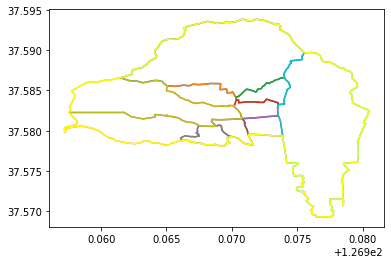

In [ ]:
from shapely.geometry import Polygon, MultiPolygon
from functools import reduce
import matplotlib.pyplot as plt

ax = plt.plot(figsize=(10,10))

dcd = '11110515'
cond = legal3['domn_cd'] == dcd
filtered = legal3[cond]

print(filtered)
for _, f in filtered.iterrows():

    if type(f['geometry']) == MultiPolygon:
        for p in list(f['geometry']):
            x, y = p.exterior.xy
            plt.plot(x, y)
        continue

    x, y = f['geometry'].exterior.xy
    plt.plot(x, y)

filtered = filtered['geometry']
result = reduce(lambda x, y: x.union(y), filtered)
x, y = result.exterior.xy
plt.plot(x, y, color='yellow')

print(filtered)
print(result)


In [ ]:
legal3[legal3['domn_cd']=='29200670']

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자,domn_cd,legal_cd,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
1818,2920067000,광주광역시,광산구,평동,2920014500,옥동,19981015,NaN,29200670,29200145,29200145,Ok-dong,옥동,"POLYGON ((126.74934 35.12753, 126.75043 35.127..."
1819,2920067000,광주광역시,광산구,평동,2920014600,월전동,19981015,NaN,29200670,29200146,29200146,Woljeon-dong,월전동,"POLYGON ((126.76062 35.11587, 126.76090 35.116..."
1820,2920067000,광주광역시,광산구,평동,2920014700,장록동,19981015,NaN,29200670,29200147,29200147,Jangnok-dong,장록동,"POLYGON ((126.76592 35.14026, 126.76740 35.140..."
1821,2920067000,광주광역시,광산구,평동,2920014800,송촌동,19981015,NaN,29200670,29200148,29200148,Songchon-dong,송촌동,"POLYGON ((126.76863 35.14411, 126.76863 35.144..."
1822,2920067000,광주광역시,광산구,평동,2920014900,지죽동,19981015,NaN,29200670,29200149,29200149,Jijuk-dong,지죽동,"MULTIPOLYGON (((126.76714 35.14131, 126.76693 ..."
1823,2920067000,광주광역시,광산구,평동,2920015000,용동,19981015,NaN,29200670,29200150,29200150,Yong-dong,용동,"POLYGON ((126.73967 35.13677, 126.73973 35.136..."
1824,2920067000,광주광역시,광산구,평동,2920015100,용곡동,19981015,NaN,29200670,29200151,29200151,Yonggok-dong,용곡동,"POLYGON ((126.72909 35.13254, 126.72914 35.132..."
1825,2920067000,광주광역시,광산구,평동,2920015200,지정동,19981015,NaN,29200670,29200152,29200152,Jijeong-dong,지정동,"POLYGON ((126.69865 35.13466, 126.69879 35.135..."
1826,2920067000,광주광역시,광산구,평동,2920015300,명화동,19981015,NaN,29200670,29200153,29200153,Myeonghwa-dong,명화동,"POLYGON ((126.70443 35.12890, 126.70447 35.129..."
1827,2920067000,광주광역시,광산구,평동,2920015400,동산동,19981015,NaN,29200670,29200154,29200154,Dongsan-dong,동산동,"POLYGON ((126.69841 35.12355, 126.69872 35.123..."


In [ ]:
# reduce(lambda x, y: x.union(y), legal3[legal3['domn_cd']=='29200670']['geometry'])

temp_dups = legal3[legal3['domn_cd']=='29200670']['geometry']
temp_list = zip(temp_dups[:-1], temp_dups[1:])

# for prv, nxt in temp_list:
#     print(prv, nxt)
#     print(prv.union(nxt))

print(temp_dups.iloc[2].buffer(0).union(temp_dups.iloc[3]))

POLYGON ((126.7659200859213 35.14025500673748, 126.7674031517436 35.14037716494363, 126.7674041062002 35.14040407222029, 126.7673797021662 35.1404807754325, 126.7673305551521 35.1406413739933, 126.7673177578845 35.14068064832963, 126.7672433337789 35.14086246096952, 126.7671929550153 35.14097405044103, 126.7671905362004 35.14097953501462, 126.7671209766217 35.14107953201518, 126.7670330191119 35.14120105378927, 126.7669835192728 35.14124320452223, 126.7669346096967 35.14132057229353, 126.7671384983441 35.14131012334029, 126.7671785747014 35.14132456840084, 126.7671900760225 35.14132021906259, 126.7673047423131 35.1412752287011, 126.7674288217315 35.14123082425956, 126.7675254221611 35.14120636771247, 126.7677329542814 35.1411802953042, 126.7678970468267 35.14118004376716, 126.7680328756479 35.14116720875197, 126.7681803035746 35.14117340547486, 126.7681859656657 35.1411734163723, 126.7685354757877 35.14114057617946, 126.7685486929506 35.14113862761217, 126.7687624114852 35.141105516735

In [ ]:
print(temp_dups.iloc[2].is_valid)
print(temp_dups.iloc[2].buffer(0).is_valid)

False
True


In [ ]:
from shapely.geometry import Polygon, MultiPolygon, Point

for dcd in duplicates:

    cond = (legal3['domn_cd'] == dcd)
    rows_found = legal3[cond]

    valid_polygons = []
    geometries = rows_found['geometry']

    for g in geometries:
        if not g.is_valid:
            g = g.buffer(0)

        valid_polygons.append(g)

    # for pgon in polygons:
    #     if not pgon.is_valid:
    #         pgon = pt.buffer(0)

    #     if type(pgon) == Polygon:
    #         x, y = pgon.exterior.coords.xy
    #     elif type(pgon) == MultiPolygon:
    #         print(list(pgon.bounds))
    #         new_pgon = Polygon(list(pgon.bounds))
    #         x, y = new_pgon.exterior.coords.xy

    #     valid_polygons.append((x, y))

    unioned_polygon = reduce(lambda x, y: x.union(y), valid_polygons)

    representative = rows_found.iloc[0].copy()
    representative.geometry = unioned_polygon

    idx_to_drop = list(rows_found.index)
    legal3 = legal3.drop(index=idx_to_drop)
    legal3 = legal3.append(representative)



In [ ]:
legal3

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자,domn_cd,legal_cd,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
34,1111057000,서울특별시,종로구,무악동,1111018700,무악동,19880423,NaN,11110570,11110187,11110187,Muak-dong,무악동,"POLYGON ((126.9572021015973 37.57981924098572,..."
88,1111067000,서울특별시,종로구,창신제1동,1111017400,창신동,19880423,NaN,11110670,11110174,11110174,Changsin-dong,창신동,"POLYGON ((127.0147339154034 37.58230284716659,..."
89,1111068000,서울특별시,종로구,창신제2동,1111017400,창신동,19880423,NaN,11110680,11110174,11110174,Changsin-dong,창신동,"POLYGON ((127.0147339154034 37.58230284716659,..."
90,1111069000,서울특별시,종로구,창신제3동,1111017400,창신동,19880423,NaN,11110690,11110174,11110174,Changsin-dong,창신동,"POLYGON ((127.0147339154034 37.58230284716659,..."
91,1111070000,서울특별시,종로구,숭인제1동,1111017500,숭인동,19880423,NaN,11110700,11110175,11110175,Sungin-dong,숭인동,"POLYGON ((127.0148283843987 37.58232536120665,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,4139051000,경기도,시흥시,대야동,4139010100,대야동,19890101,NaN,41390510,41390101,41390101,Daeya-dong,대야동,"POLYGON ((126.7794043042203 37.45212563447898,..."
2367,4117351000,경기도,안양시 동안구,비산1동,4117110100,안양동,19921001,NaN,41173510,41171101,41171101,Anyang-dong,안양동,"POLYGON ((126.9411161883947 37.39174790385751,..."
2444,4122051000,경기도,평택시,중앙동,4122010100,서정동,19950510,NaN,41220510,41220101,41220101,Seojeong-dong,서정동,"POLYGON ((127.0407874192551 37.07804507149142,..."
5387,4729053000,경상북도,경산시,남부동,4729010100,삼남동,19890101,NaN,47290530,47290101,47290101,Samnam-dong,삼남동,"POLYGON ((128.7362877140484 35.81714708068816,..."


Case 1 is done!

----

----
## 2.4-법정동 기준으로 SHP과 연결 (geodata)

### 하나의 법정동에 여러 행정동이 매핑되어 있는 경우
- 도착 인원수 합친 다음에 

In [ ]:
legal3.groupby('legal_cd').count()

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자,domn_cd,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
legal_cd,,,,,,,,,,,,,
11110101,1,1,1,1,1,1,1,0,1,1,1,1,1
11110106,1,1,1,1,1,1,1,0,1,1,1,1,1
11110119,1,1,1,1,1,1,1,0,1,1,1,1,1
11110130,1,1,1,1,1,1,1,0,1,1,1,1,1
11110139,1,1,1,1,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50130250,1,1,1,1,1,1,1,0,1,1,1,1,1
50130253,1,1,1,1,1,1,1,0,1,1,1,1,1
50130259,1,1,1,1,1,1,1,0,1,1,1,1,1


In [ ]:
legal3.groupby('legal_cd').count()['domn_cd'].sum()

3502

In [ ]:
a = legal3.groupby('legal_cd').count().reset_index()
b = set(a[a['domn_cd']>1]['legal_cd'])
b

{'11110174',
 '11110175',
 '11140132',
 '11140162',
 '11170129',
 '11170130',
 '11200107',
 '11200114',
 '11200115',
 '11200118',
 '11215101',
 '11215103',
 '11215105',
 '11230104',
 '11230105',
 '11230106',
 '11230109',
 '11230110',
 '11260101',
 '11260102',
 '11260103',
 '11260104',
 '11260105',
 '11260106',
 '11290103',
 '11290133',
 '11290134',
 '11290136',
 '11290138',
 '11305101',
 '11305102',
 '11305103',
 '11320105',
 '11320106',
 '11320107',
 '11320108',
 '11350102',
 '11350103',
 '11350104',
 '11350105',
 '11350106',
 '11380103',
 '11380104',
 '11380107',
 '11380109',
 '11410111',
 '11410118',
 '11410119',
 '11410120',
 '11440101',
 '11440104',
 '11440108',
 '11440123',
 '11440125',
 '11470101',
 '11470102',
 '11470103',
 '11500102',
 '11500103',
 '11500104',
 '11500105',
 '11500109',
 '11530102',
 '11530106',
 '11530107',
 '11530108',
 '11545102',
 '11545103',
 '11560101',
 '11560132',
 '11560133',
 '11590101',
 '11590102',
 '11590107',
 '11590109',
 '11620101',
 '11620102',

In [ ]:
legal3[legal3['legal_cd']=='11110175']

,행정동코드,시도명,시군구명,읍면동명,법정동코드,동리명,생성일자,말소일자,domn_cd,legal_cd,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
91,1111070000,서울특별시,종로구,숭인제1동,1111017500,숭인동,19880423,NaN,11110700,11110175,11110175,Sungin-dong,숭인동,"POLYGON ((127.0148283843987 37.58232536120665,..."
92,1111071000,서울특별시,종로구,숭인제2동,1111017500,숭인동,19880423,NaN,11110710,11110175,11110175,Sungin-dong,숭인동,"POLYGON ((127.0148283843987 37.58232536120665,..."


In [ ]:
leg_gnam_outbd = pd.merge(
    exp_gnam_outbd,
    legal3,
    how='inner',
    left_on='domn_dist_cd',
    right_on='domn_cd'
)
leg_gnam_outbd

,depart_emd_cd,arrive_emd_cd,sum,통계청행정동코드,행자부행정동코드,시도명_x,시군구명_x,행정동명,stat_dist_cd,domn_dist_cd,행정동코드,시도명_y,시군구명_y,읍면동명,법정동코드,동리명,생성일자,말소일자,domn_cd,legal_cd,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,1123051,1101053,67.41,1101053,11110530,서울,종로구,사직동,1101053,11110530,1111053000,서울특별시,종로구,사직동,1111010600,통의동,19880423,NaN,11110530,11110106,11110106,Tongui-dong,통의동,"POLYGON ((126.9652640682588 37.57278275212411,..."
1,1123052,1101053,21.32,1101053,11110530,서울,종로구,사직동,1101053,11110530,1111053000,서울특별시,종로구,사직동,1111010600,통의동,19880423,NaN,11110530,11110106,11110106,Tongui-dong,통의동,"POLYGON ((126.9652640682588 37.57278275212411,..."
2,1123053,1101053,7.96,1101053,11110530,서울,종로구,사직동,1101053,11110530,1111053000,서울특별시,종로구,사직동,1111010600,통의동,19880423,NaN,11110530,11110106,11110106,Tongui-dong,통의동,"POLYGON ((126.9652640682588 37.57278275212411,..."
3,1123059,1101053,9.28,1101053,11110530,서울,종로구,사직동,1101053,11110530,1111053000,서울특별시,종로구,사직동,1111010600,통의동,19880423,NaN,11110530,11110106,11110106,Tongui-dong,통의동,"POLYGON ((126.9652640682588 37.57278275212411,..."
4,1123060,1101053,4.52,1101053,11110530,서울,종로구,사직동,1101053,11110530,1111053000,서울특별시,종로구,사직동,1111010600,통의동,19880423,NaN,11110530,11110106,11110106,Tongui-dong,통의동,"POLYGON ((126.9652640682588 37.57278275212411,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,1123075,1125070,3.63,1125070,11740690,서울,강동구,둔촌1동,1125070,11740690,1174069000,서울특별시,강동구,둔촌제1동,1174010600,둔촌동,19880423,NaN,11740690,11740106,11740106,Dunchon-dong,둔촌동,"POLYGON ((127.1566858199417 37.53755804315598,..."
6441,1123078,1125070,3.03,1125070,11740690,서울,강동구,둔촌1동,1125070,11740690,1174069000,서울특별시,강동구,둔촌제1동,1174010600,둔촌동,19880423,NaN,11740690,11740106,11740106,Dunchon-dong,둔촌동,"POLYGON ((127.1566858199417 37.53755804315598,..."
6442,1123079,1125070,8.62,1125070,11740690,서울,강동구,둔촌1동,1125070,11740690,1174069000,서울특별시,강동구,둔촌제1동,1174010600,둔촌동,19880423,NaN,11740690,11740106,11740106,Dunchon-dong,둔촌동,"POLYGON ((127.1566858199417 37.53755804315598,..."
6443,1123072,1115062,3.04,1115062,11470610,서울,양천구,신월6동,1115062,11470610,1147061000,서울특별시,양천구,신월6동,1147010300,신월동,19880423,NaN,11470610,11470103,11470103,Sinwol-dong,신월동,"POLYGON ((126.8298166830456 37.54732867767618,..."


In [ ]:
geo_gnam_outbd = pd.merge(
    leg_gnam_outbd,
    shp_df,
    how='left',
    left_on='legal_cd',
    right_on='EMD_CD'
)

geo_gnam_outbd

,depart_emd_cd,arrive_emd_cd,sum,통계청행정동코드,행자부행정동코드,시도명_x,시군구명_x,행정동명,stat_dist_cd,domn_dist_cd,행정동코드,시도명_y,시군구명_y,읍면동명,법정동코드,동리명,생성일자,말소일자,domn_cd,legal_cd,EMD_CD_x,EMD_ENG_NM_x,EMD_KOR_NM_x,geometry_x,EMD_CD_y,EMD_ENG_NM_y,EMD_KOR_NM_y,geometry_y
0,1123051,1101053,67.41,1101053,11110530,서울,종로구,사직동,1101053,11110530,1111053000,서울특별시,종로구,사직동,1111010600,통의동,19880423,NaN,11110530,11110106,11110106,Tongui-dong,통의동,"POLYGON ((126.9652640682588 37.57278275212411,...",11110106,Tongui-dong,통의동,"POLYGON ((953546.683 1953456.239, 953546.872 1..."
1,1123052,1101053,21.32,1101053,11110530,서울,종로구,사직동,1101053,11110530,1111053000,서울특별시,종로구,사직동,1111010600,통의동,19880423,NaN,11110530,11110106,11110106,Tongui-dong,통의동,"POLYGON ((126.9652640682588 37.57278275212411,...",11110106,Tongui-dong,통의동,"POLYGON ((953546.683 1953456.239, 953546.872 1..."
2,1123053,1101053,7.96,1101053,11110530,서울,종로구,사직동,1101053,11110530,1111053000,서울특별시,종로구,사직동,1111010600,통의동,19880423,NaN,11110530,11110106,11110106,Tongui-dong,통의동,"POLYGON ((126.9652640682588 37.57278275212411,...",11110106,Tongui-dong,통의동,"POLYGON ((953546.683 1953456.239, 953546.872 1..."
3,1123059,1101053,9.28,1101053,11110530,서울,종로구,사직동,1101053,11110530,1111053000,서울특별시,종로구,사직동,1111010600,통의동,19880423,NaN,11110530,11110106,11110106,Tongui-dong,통의동,"POLYGON ((126.9652640682588 37.57278275212411,...",11110106,Tongui-dong,통의동,"POLYGON ((953546.683 1953456.239, 953546.872 1..."
4,1123060,1101053,4.52,1101053,11110530,서울,종로구,사직동,1101053,11110530,1111053000,서울특별시,종로구,사직동,1111010600,통의동,19880423,NaN,11110530,11110106,11110106,Tongui-dong,통의동,"POLYGON ((126.9652640682588 37.57278275212411,...",11110106,Tongui-dong,통의동,"POLYGON ((953546.683 1953456.239, 953546.872 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,1123075,1125070,3.63,1125070,11740690,서울,강동구,둔촌1동,1125070,11740690,1174069000,서울특별시,강동구,둔촌제1동,1174010600,둔촌동,19880423,NaN,11740690,11740106,11740106,Dunchon-dong,둔촌동,"POLYGON ((127.1566858199417 37.53755804315598,...",11740106,Dunchon-dong,둔촌동,"POLYGON ((969669.593 1948748.489, 969656.716 1..."
6441,1123078,1125070,3.03,1125070,11740690,서울,강동구,둔촌1동,1125070,11740690,1174069000,서울특별시,강동구,둔촌제1동,1174010600,둔촌동,19880423,NaN,11740690,11740106,11740106,Dunchon-dong,둔촌동,"POLYGON ((127.1566858199417 37.53755804315598,...",11740106,Dunchon-dong,둔촌동,"POLYGON ((969669.593 1948748.489, 969656.716 1..."
6442,1123079,1125070,8.62,1125070,11740690,서울,강동구,둔촌1동,1125070,11740690,1174069000,서울특별시,강동구,둔촌제1동,1174010600,둔촌동,19880423,NaN,11740690,11740106,11740106,Dunchon-dong,둔촌동,"POLYGON ((127.1566858199417 37.53755804315598,...",11740106,Dunchon-dong,둔촌동,"POLYGON ((969669.593 1948748.489, 969656.716 1..."
6443,1123072,1115062,3.04,1115062,11470610,서울,양천구,신월6동,1115062,11470610,1147061000,서울특별시,양천구,신월6동,1147010300,신월동,19880423,NaN,11470610,11470103,11470103,Sinwol-dong,신월동,"POLYGON ((126.8298166830456 37.54732867767618,...",11470103,Sinwol-dong,신월동,"POLYGON ((940799.505 1949988.116, 940800.157 1..."


## 2.5-통계청 행정동, 행자부 행정동, 법정동, 그리고 SHAPE

In [ ]:
excelurl = 'http://kssc.kostat.go.kr/ksscNew_web/download/%ED%95%9C%EA%B5%AD%ED%96%89%EC%A0%95%EA%B5%AC%EC%97%AD%EB%B6%84%EB%A5%98_2021.7.1.%EA%B8%B0%EC%A4%80.xlsx'
sheetname = '법정동코드 연계 자료분석용'
stat_cd = pd.read_excel(excelurl, sheetname, header=1)

In [ ]:
stat_cd

,시도,시군구,행정구역명,행정동(행정기관명),법정동,행정구역코드,행정기관코드,행정기관 생성일,법정동코드,법정동 관할지역,행정동 영문명칭,비고
0,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,11.0,1100000000,19880423,1100000000,NaN,Seoul,NaN
1,서울특별시,종로구,종로구,종로구,종로구,11010.0,1111000000,19880423,1111000000,NaN,Jongno-gu,NaN
2,서울특별시,종로구,청운효자동,청운효자동,청운동,1101072.0,1111051500,20081101,1111010100,NaN,Cheongunhyoja-dong,NaN
3,서울특별시,종로구,청운효자동,청운효자동,신교동,1101072.0,1111051500,20081101,1111010200,NaN,Cheongunhyoja-dong,NaN
4,서울특별시,종로구,청운효자동,청운효자동,궁정동,1101072.0,1111051500,20081101,1111010300,NaN,Cheongunhyoja-dong,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
21702,제주특별자치도,서귀포시,중문동,중문동,대포동,3902061.0,5013061000,20060701,5013011400,NaN,Jungmun-dong,NaN
21703,제주특별자치도,서귀포시,중문동,중문동,하원동,3902061.0,5013061000,20060701,5013011800,NaN,Jungmun-dong,NaN
21704,제주특별자치도,서귀포시,예래동,예래동,색달동,3902062.0,5013062000,20060701,5013011900,NaN,Yerae-dong,NaN
21705,제주특별자치도,서귀포시,예래동,예래동,상예동,3902062.0,5013062000,20060701,5013012000,NaN,Yerae-dong,NaN


In [ ]:
stat_cd['행정구역코드'].nunique(), stat_cd['행정기관코드'].nunique()

(3776, 3851)

In [ ]:
cmpset = stat_cd.loc[:, ['행정구역코드', '행정기관코드']]
cmpset

,행정구역코드,행정기관코드
0,11.0,1100000000
1,11010.0,1111000000
2,1101072.0,1111051500
3,1101072.0,1111051500
4,1101072.0,1111051500
...,...,...
21702,3902061.0,5013061000
21703,3902061.0,5013061000
21704,3902062.0,5013062000
21705,3902062.0,5013062000


In [ ]:
stat_unique = cmpset['행정구역코드'].unique()
domn_unique = cmpset['행정기관코드'].unique()

In [ ]:
len(stat_unique), len(domn_unique)

(3777, 3851)

In [ ]:
stat_cd.isnull().sum()

시도                0
시군구               0
행정구역명             0
행정동(행정기관명)        0
법정동               0
행정구역코드           78
행정기관코드            0
행정기관 생성일          0
법정동코드             0
법정동 관할지역      19984
행정동 영문명칭         12
비고            20867
dtype: int64

In [ ]:
3777 + 78

3855

In [ ]:
stat_cd[stat_cd['행정구역코드'].isnull()]

,시도,시군구,행정구역명,행정동(행정기관명),법정동,행정구역코드,행정기관코드,행정기관 생성일,법정동코드,법정동 관할지역,행정동 영문명칭,비고
1451,대구광역시,달성군,논공읍공단출장소,논공읍공단출장소,남리,NaN,2771025400,19960901,2771025327,NaN,-,NaN
1452,대구광역시,달성군,논공읍공단출장소,논공읍공단출장소,북리,NaN,2771025400,19960901,2771025328,NaN,-,NaN
1453,대구광역시,달성군,논공읍공단출장소,논공읍공단출장소,본리리,NaN,2771025400,19960901,2771025329,NaN,-,NaN
1466,대구광역시,달성군,다사읍서재출장소,다사읍서재출장소,달성군,NaN,2771025700,20010323,2771000000,NaN,-,NaN
1602,인천광역시,중구,중구영종출장소,중구영종출장소,중구,NaN,2811400000,20060712,2811400000,NaN,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19900,경상남도,밀양시,삼랑진임천출장소,삼랑진임천출장소,밀양시,NaN,4827025100,20010126,4827000000,NaN,-,NaN
20080,경상남도,거제시,사등면가조출장소,사등면가조출장소,거제시,NaN,4831036600,19950101,4831000000,NaN,-,NaN
20101,경상남도,거제시,하청면칠천출장소,하청면칠천출장소,거제시,NaN,4831038500,19950101,4831000000,NaN,-,NaN
20113,경상남도,거제시,장목면외포출장소,장목면외포출장소,거제시,NaN,4831039500,19950101,4831000000,NaN,-,NaN


In [ ]:
codeduplicates = {}
for stcd in stat_unique:
    pool = stat_cd[stat_cd['행정구역코드'] == stcd]
    check_domnunique = pool['행정기관코드'].unique()
    if len(check_domnunique) > 1:
        codeduplicates[stcd] = check_domnunique

codeduplicates
        

{}

In [ ]:
stat_cd.dtypes

시도             object
시군구            object
행정구역명          object
행정동(행정기관명)     object
법정동            object
행정구역코드        float64
행정기관코드          int64
행정기관 생성일        int64
법정동코드           int64
법정동 관할지역       object
행정동 영문명칭       object
비고             object
dtype: object

In [ ]:
statcodes = cmpset.copy()
notnullidx = statcodes['행정구역코드'].notnull()
statcodes = statcodes[notnullidx]
statcodes

,행정구역코드,행정기관코드
0,11.0,1100000000
1,11010.0,1111000000
2,1101072.0,1111051500
3,1101072.0,1111051500
4,1101072.0,1111051500
...,...,...
21702,3902061.0,5013061000
21703,3902061.0,5013061000
21704,3902062.0,5013062000
21705,3902062.0,5013062000


In [ ]:
statcodes['stat_cd'] = statcodes['행정구역코드'].astype(int).astype(str)
statcodes['domn_cd'] = statcodes['행정기관코드'].astype(str)

In [ ]:
statcodes.drop(columns=['행정구역코드', '행정기관코드'], inplace=True)

In [ ]:
statcodes

,stat_cd,domn_cd
0,11,1100000000
1,11010,1111000000
2,1101072,1111051500
3,1101072,1111051500
4,1101072,1111051500
...,...,...
21702,3902061,5013061000
21703,3902061,5013061000
21704,3902062,5013062000
21705,3902062,5013062000


In [ ]:
statcodes.domn_cd = statcodes.domn_cd.apply(lambda x: x[:8])

In [ ]:
statcodes

,stat_cd,domn_cd
0,11,11000000
1,11010,11110000
2,1101072,11110515
3,1101072,11110515
4,1101072,11110515
...,...,...
21702,3902061,50130610
21703,3902061,50130610
21704,3902062,50130620
21705,3902062,50130620


In [ ]:
statcodes = statcodes.drop_duplicates()

In [ ]:
code_shp_map = legal3.drop(columns=['행정동코드', '시도명', '시군구명', '읍면동명', '법정동코드', '동리명', '생성일자', '말소일자'])
code_shp_map

,domn_cd,legal_cd,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
34,11110570,11110187,11110187,Muak-dong,무악동,"POLYGON ((126.9572021015973 37.57981924098572,..."
88,11110670,11110174,11110174,Changsin-dong,창신동,"POLYGON ((127.0147339154034 37.58230284716659,..."
89,11110680,11110174,11110174,Changsin-dong,창신동,"POLYGON ((127.0147339154034 37.58230284716659,..."
90,11110690,11110174,11110174,Changsin-dong,창신동,"POLYGON ((127.0147339154034 37.58230284716659,..."
91,11110700,11110175,11110175,Sungin-dong,숭인동,"POLYGON ((127.0148283843987 37.58232536120665,..."
...,...,...,...,...,...,...
2706,41390510,41390101,41390101,Daeya-dong,대야동,"POLYGON ((126.7794043042203 37.45212563447898,..."
2367,41173510,41171101,41171101,Anyang-dong,안양동,"POLYGON ((126.9411161883947 37.39174790385751,..."
2444,41220510,41220101,41220101,Seojeong-dong,서정동,"POLYGON ((127.0407874192551 37.07804507149142,..."
5387,47290530,47290101,47290101,Samnam-dong,삼남동,"POLYGON ((128.7362877140484 35.81714708068816,..."


In [ ]:
codemaps = pd.merge(
    statcodes,
    code_shp_map,
    how='inner',
    on='domn_cd'
)

codemaps

,stat_cd,domn_cd,legal_cd,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,1101072,11110515,11110101,11110101,Cheongun-dong,청운동,"POLYGON ((126.9738958817359 37.57931836950972,..."
1,1101053,11110530,11110106,11110106,Tongui-dong,통의동,"POLYGON ((126.9652640682588 37.57278275212411,..."
2,1101054,11110540,11110139,11110139,Palpan-dong,팔판동,"POLYGON ((126.983823018518 37.57935153019049, ..."
3,1101055,11110550,11110184,11110184,Buam-dong,부암동,"POLYGON ((126.9654779957249 37.60193926866101,..."
4,1101056,11110560,11110182,11110182,Gugi-dong,구기동,"POLYGON ((126.9584184170797 37.62946975159029,..."
...,...,...,...,...,...,...,...
3486,3902058,50130580,50130106,50130106,Seohong-dong,서홍동,"POLYGON ((126.5238963660234 33.36177531814071,..."
3487,3902059,50130590,50130102,50130102,Beophwan-dong,법환동,(POLYGON ((126.5138835607763 33.21726656276107...
3488,3902060,50130600,50130115,50130115,Wolpyeong-dong,월평동,(POLYGON ((126.5087133436357 33.27798643170856...
3489,3902061,50130610,50130112,50130112,Jungmun-dong,중문동,"POLYGON ((126.4639615060461 33.35985790020132,..."


## 2.6-이동 데이터의 반영

In [ ]:
codemaps

,stat_cd,domn_cd,legal_cd,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,1101072,11110515,11110101,11110101,Cheongun-dong,청운동,"POLYGON ((126.9738958817359 37.57931836950972,..."
1,1101053,11110530,11110106,11110106,Tongui-dong,통의동,"POLYGON ((126.9652640682588 37.57278275212411,..."
2,1101054,11110540,11110139,11110139,Palpan-dong,팔판동,"POLYGON ((126.983823018518 37.57935153019049, ..."
3,1101055,11110550,11110184,11110184,Buam-dong,부암동,"POLYGON ((126.9654779957249 37.60193926866101,..."
4,1101056,11110560,11110182,11110182,Gugi-dong,구기동,"POLYGON ((126.9584184170797 37.62946975159029,..."
...,...,...,...,...,...,...,...
3486,3902058,50130580,50130106,50130106,Seohong-dong,서홍동,"POLYGON ((126.5238963660234 33.36177531814071,..."
3487,3902059,50130590,50130102,50130102,Beophwan-dong,법환동,(POLYGON ((126.5138835607763 33.21726656276107...
3488,3902060,50130600,50130115,50130115,Wolpyeong-dong,월평동,(POLYGON ((126.5087133436357 33.27798643170856...
3489,3902061,50130610,50130112,50130112,Jungmun-dong,중문동,"POLYGON ((126.4639615060461 33.35985790020132,..."


In [ ]:
fromgangnam = pd.merge(
    gnam_outbd_reset,
    codemaps,
    how='inner',
    left_on='arrive_emd_cd',
    right_on='stat_cd'
)

fromgangnam

,depart_emd_cd,arrive_emd_cd,sum,stat_cd,domn_cd,legal_cd,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,1123051,1101053,67.41,1101053,11110530,11110106,11110106,Tongui-dong,통의동,"POLYGON ((126.9652640682588 37.57278275212411,..."
1,1123052,1101053,21.32,1101053,11110530,11110106,11110106,Tongui-dong,통의동,"POLYGON ((126.9652640682588 37.57278275212411,..."
2,1123053,1101053,7.96,1101053,11110530,11110106,11110106,Tongui-dong,통의동,"POLYGON ((126.9652640682588 37.57278275212411,..."
3,1123059,1101053,9.28,1101053,11110530,11110106,11110106,Tongui-dong,통의동,"POLYGON ((126.9652640682588 37.57278275212411,..."
4,1123060,1101053,4.52,1101053,11110530,11110106,11110106,Tongui-dong,통의동,"POLYGON ((126.9652640682588 37.57278275212411,..."
...,...,...,...,...,...,...,...,...,...,...
11687,1123079,2302063,3.19,2302063,28140630,28140107,28140107,Songnim-dong,송림동,"POLYGON ((126.6589359077749 37.4859927698982, ..."
11688,1123079,2308055,8.22,2308055,28260543,28260108,28260108,Gajeong-dong,가정동,"POLYGON ((126.6626261969439 37.52622154687241,..."
11689,1123079,3102255,4.56,3102255,41133550,41133104,41133104,Eunhaeng-dong,은행동,"POLYGON ((127.162034705013 37.4514607818309, 1..."
11690,1123079,3109278,4.56,3109278,41273555,41273108,41273108,Wongok-dong,원곡동,(POLYGON ((126.7850284961342 37.33737778875284...


In [ ]:
fromgangnam_sum = fromgangnam.groupby('arrive_emd_cd').agg(['sum'])['sum'].reset_index()
fromgangnam_sum

,arrive_emd_cd,sum
0,1101053,217.42
1,1101054,10.10
2,1101055,137.09
3,1101056,228.33
4,1101057,54.21
...,...,...
999,3138037,6.60
1000,3138038,31.52
1001,3138039,37.72
1002,3138040,33.20


In [ ]:
geo_fromgangnam_sum = pd.merge(
    fromgangnam_sum,
    codemaps,
    how='left',
    left_on='arrive_emd_cd',
    right_on='stat_cd'
)

geo_fromgangnam_sum

,arrive_emd_cd,sum,stat_cd,domn_cd,legal_cd,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,1101053,217.42,1101053,11110530,11110106,11110106,Tongui-dong,통의동,"POLYGON ((126.9652640682588 37.57278275212411,..."
1,1101054,10.10,1101054,11110540,11110139,11110139,Palpan-dong,팔판동,"POLYGON ((126.983823018518 37.57935153019049, ..."
2,1101055,137.09,1101055,11110550,11110184,11110184,Buam-dong,부암동,"POLYGON ((126.9654779957249 37.60193926866101,..."
3,1101056,228.33,1101056,11110560,11110182,11110182,Gugi-dong,구기동,"POLYGON ((126.9584184170797 37.62946975159029,..."
4,1101057,54.21,1101057,11110570,11110187,11110187,Muak-dong,무악동,"POLYGON ((126.9572021015973 37.57981924098572,..."
...,...,...,...,...,...,...,...,...,...
999,3138037,6.60,3138037,41830370,41830370,41830370,Cheongun-myeon,청운면,"POLYGON ((127.6779279465846 37.53105913295234,..."
1000,3138038,31.52,3138038,41830380,41830380,41830380,Yangdong-myeon,양동면,"POLYGON ((127.6720182402069 37.4800289953792, ..."
1001,3138039,37.72,3138039,41830395,41830395,41830395,Jipyeong-myeon,지평면,"POLYGON ((127.5846675486292 37.43469782893449,..."
1002,3138040,33.20,3138040,41830400,41830400,41830400,Yongmun-myeon,용문면,"POLYGON ((127.5271926098375 37.52568166353632,..."


### 2.7 이동데이터를 Choropleth Map으로 표현

In [ ]:
geo_gangnam_data = codemaps.loc[:, ['stat_cd', 'geometry']].set_index('stat_cd')
geo_gangnam_data

,geometry
stat_cd,
1101072,"POLYGON ((126.9738958817359 37.57931836950972,..."
1101053,"POLYGON ((126.9652640682588 37.57278275212411,..."
1101054,"POLYGON ((126.983823018518 37.57935153019049, ..."
1101055,"POLYGON ((126.9654779957249 37.60193926866101,..."
1101056,"POLYGON ((126.9584184170797 37.62946975159029,..."
...,...
3902058,"POLYGON ((126.5238963660234 33.36177531814071,..."
3902059,(POLYGON ((126.5138835607763 33.21726656276107...
3902060,(POLYGON ((126.5087133436357 33.27798643170856...


In [ ]:
geo_gdf = gpd.GeoDataFrame(geo_gangnam_data.reset_index(), geometry='geometry')
geo_gdf

,stat_cd,geometry
0,1101072,"POLYGON ((126.97390 37.57932, 126.97384 37.579..."
1,1101053,"POLYGON ((126.96526 37.57278, 126.96525 37.572..."
2,1101054,"POLYGON ((126.98382 37.57935, 126.98391 37.579..."
3,1101055,"POLYGON ((126.96548 37.60194, 126.96556 37.601..."
4,1101056,"POLYGON ((126.95842 37.62947, 126.95881 37.629..."
...,...,...
3486,3902058,"POLYGON ((126.52390 33.36178, 126.52442 33.362..."
3487,3902059,"MULTIPOLYGON (((126.51388 33.21727, 126.51373 ..."
3488,3902060,"MULTIPOLYGON (((126.50871 33.27799, 126.50873 ..."
3489,3902061,"POLYGON ((126.46396 33.35986, 126.46482 33.360..."


In [ ]:
arrival_count = fromgangnam_sum
arrival_count.columns = ['stat_cd', 'count']
arrival_count.set_index('stat_cd', inplace=True)
arrival_count

,count
stat_cd,
1101053,217.42
1101054,10.10
1101055,137.09
1101056,228.33
1101057,54.21
...,...
3138037,6.60
3138038,31.52
3138039,37.72


In [ ]:
arrival_count.reset_index(inplace=True)

In [ ]:
unique_statcodes = arrival_count.stat_cd.unique()

In [ ]:
geo_gdf2 = geo_gdf.copy()

for idx, row in geo_gdf2.iterrows():

    if row.stat_cd not in unique_statcodes:
        geo_gdf2.drop(idx, inplace=True)

geo_gdf2 = geo_gdf2.reset_index()

In [ ]:
arrival_count.count()

stat_cd    1004
count      1004
dtype: int64

In [ ]:
import folium

choromap = folium.Map(location=[37.4966965457217, 127.06281304835339], tiles='cartodbpositron', zoom_start=12)
choromap

In [ ]:
folium.Choropleth(
    geo_data=geo_gdf2.__geo_interface__,
    data=arrival_count['count'],
    key_on="feature.id", 
    fill_color='YlGnBu', 
    legend_name='GangNam Outbound (Midnight - 1:00AM)'
).add_to(choromap)

In [ ]:
choromap.save('choropleth.html')

## 2.7-김포(장기동)에서의 출퇴근시간대 출발인원이 향하는 곳

In [ ]:
stat_cd[stat_cd['행정동(행정기관명)'] == '장기동']

,시도,시군구,행정구역명,행정동(행정기관명),법정동,행정구역코드,행정기관코드,행정기관 생성일,법정동코드,법정동 관할지역,행정동 영문명칭,비고
1400,대구광역시,달서구,장기동,장기동,장동,2207059.0,2729056800,19960201,2729010900,NaN,Janggi-dong,NaN
1401,대구광역시,달서구,장기동,장기동,장기동,2207059.0,2729056800,19960201,2729011000,분할연계,Janggi-dong,NaN
4284,경기도,김포시,장기동,장기동,장기동,3123056.0,4157056000,20120924,4157010400,분할연계,Janggi-dong,NaN
4285,경기도,김포시,장기동,장기동,감정동,3123056.0,4157056000,20120924,4157010500,분할연계,Janggi-dong,NaN


In [ ]:
# commute1_df = pd.read_csv('seoul_daily_move_2021.08_08.csv', encoding='euc-kr')
# commute2_df = pd.read_csv('seoul_daily_move_2021.08_09.csv', encoding='euc-kr')
# commute_df = pd.concat(
#     [commute1_df, commute2_df]
# )

In [ ]:
commute_df = pd.read_csv('seoul_daily_move_2021.08_08.csv', encoding='euc-kr')

In [ ]:
commute_df

,대상연월,요일,도착시간,출발 행정동 코드,도착 행정동 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202108,일,8,1111065,1104062,F,35,HE,30,6.06
1,202108,일,8,3102363,1125074,M,20,WH,30,*
2,202108,일,8,1105067,34000,M,50,HE,40,3.27
3,202108,일,8,1107062,1107062,M,50,HE,10,16.42
4,202108,일,8,1124069,3102254,M,55,EH,20,3.28
...,...,...,...,...,...,...,...,...,...,...
5572103,202108,토,8,1125072,1124061,F,40,HW,10,3.45
5572104,202108,토,8,1122053,1122053,F,30,WH,10,*
5572105,202108,토,8,1107068,3113014,M,70,HW,40,4.66
5572106,202108,토,8,1125066,3138037,M,55,HE,30,3.29


In [ ]:
import numpy as np

commute_df['이동인구(합)'].replace({'*': np.NaN}, inplace=True)
commute_df

,대상연월,요일,도착시간,출발 행정동 코드,도착 행정동 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202108,일,8,1111065,1104062,F,35,HE,30,6.06
1,202108,일,8,3102363,1125074,M,20,WH,30,NaN
2,202108,일,8,1105067,34000,M,50,HE,40,3.27
3,202108,일,8,1107062,1107062,M,50,HE,10,16.42
4,202108,일,8,1124069,3102254,M,55,EH,20,3.28
...,...,...,...,...,...,...,...,...,...,...
5572103,202108,토,8,1125072,1124061,F,40,HW,10,3.45
5572104,202108,토,8,1122053,1122053,F,30,WH,10,NaN
5572105,202108,토,8,1107068,3113014,M,70,HW,40,4.66
5572106,202108,토,8,1125066,3138037,M,55,HE,30,3.29


In [ ]:
commute_df.dropna(inplace=True)

In [ ]:
stat_cd[stat_cd['시군구'] == '김포시']

,시도,시군구,행정구역명,행정동(행정기관명),법정동,행정구역코드,행정기관코드,행정기관 생성일,법정동코드,법정동 관할지역,행정동 영문명칭,비고
4214,경기도,김포시,김포시,김포시,김포시,31230.0,4157000000,19980401,4157000000,NaN,Gimpo-si,NaN
4215,경기도,김포시,통진읍,통진읍,통진읍,3123011.0,4157025000,20040101,4157025000,NaN,Tongjin-eup,NaN
4216,경기도,김포시,통진읍,통진읍,도사리,3123011.0,4157025000,20040101,4157025021,NaN,Tongjin-eup,NaN
4217,경기도,김포시,통진읍,통진읍,마송리,3123011.0,4157025000,20040101,4157025022,NaN,Tongjin-eup,NaN
4218,경기도,김포시,통진읍,통진읍,서암리,3123011.0,4157025000,20040101,4157025023,NaN,Tongjin-eup,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4284,경기도,김포시,장기동,장기동,장기동,3123056.0,4157056000,20120924,4157010400,분할연계,Janggi-dong,NaN
4285,경기도,김포시,장기동,장기동,감정동,3123056.0,4157056000,20120924,4157010500,분할연계,Janggi-dong,NaN
4286,경기도,김포시,마산동,마산동,마산동,3123064.0,4157057500,20190923,4157010800,NaN,Masan-dong,구래동에서 마산동 분동(190923)
4287,경기도,김포시,구래동,구래동,구래동,3123063.0,4157057000,20131028,4157010900,NaN,Gurae-dong,구래동에서 마산동을 분동신설(190923)


경기도 김포시 행정구역코드(통계청): 31230  
경기도 김포시 장기동 행정구역코드(통계청): 3123056

In [ ]:
commute_df['depart_stat_cd'] = commute_df['출발 행정동 코드'].astype(str)
commute_df['arrive_stat_cd'] = commute_df['도착 행정동 코드'].astype(str)
commute_df['total'] = commute_df['이동인구(합)'].astype(float)

In [ ]:
commute_df

,대상연월,요일,도착시간,출발 행정동 코드,도착 행정동 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합),depart_stat_cd,arrive_stat_cd,total
0,202108,일,8,1111065,1104062,F,35,HE,30,6.06,1111065,1104062,6.06
2,202108,일,8,1105067,34000,M,50,HE,40,3.27,1105067,34000,3.27
3,202108,일,8,1107062,1107062,M,50,HE,10,16.42,1107062,1107062,16.42
4,202108,일,8,1124069,3102254,M,55,EH,20,3.28,1124069,3102254,3.28
5,202108,일,8,3123012,1103072,M,35,HW,10,8.16,3123012,1103072,8.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5572102,202108,토,8,3113013,1125056,F,40,HE,20,3.43,3113013,1125056,3.43
5572103,202108,토,8,1125072,1124061,F,40,HW,10,3.45,1125072,1124061,3.45
5572105,202108,토,8,1107068,3113014,M,70,HW,40,4.66,1107068,3113014,4.66
5572106,202108,토,8,1125066,3138037,M,55,HE,30,3.29,1125066,3138037,3.29


In [ ]:
commute_df.drop(columns=['출발 행정동 코드', '도착 행정동 코드', '성별', '나이', '평균 이동 시간(분)', '이동인구(합)'], inplace=True)
commute_df

,대상연월,요일,도착시간,이동유형,depart_stat_cd,arrive_stat_cd,total
0,202108,일,8,HE,1111065,1104062,6.06
2,202108,일,8,HE,1105067,34000,3.27
3,202108,일,8,HE,1107062,1107062,16.42
4,202108,일,8,EH,1124069,3102254,3.28
5,202108,일,8,HW,3123012,1103072,8.16
...,...,...,...,...,...,...,...
5572102,202108,토,8,HE,3113013,1125056,3.43
5572103,202108,토,8,HW,1125072,1124061,3.45
5572105,202108,토,8,HW,1107068,3113014,4.66
5572106,202108,토,8,HE,1125066,3138037,3.29


In [ ]:
commute_df.columns = ['year_month', 'day', 'arrive_time', 'type', 'depart_stat_cd', 'arrive_stat_cd', 'total']
commute_df.dtypes

year_month          int64
day                object
arrive_time         int64
type               object
depart_stat_cd     object
arrive_stat_cd     object
total             float64
dtype: object

In [ ]:
weekdays = (commute_df['day'] != '일') & (commute_df['day'] != '토')
fromgimpo = (commute_df['depart_stat_cd'].str.startswith('31230'))
gimpo_outbd = commute_df[weekdays & fromgimpo]
gimpo_outbd

,year_month,day,arrive_time,type,depart_stat_cd,arrive_stat_cd,total
407865,202108,월,8,HW,3123054,1117071,3.16
407868,202108,월,8,HE,3123012,1116069,3.03
408134,202108,월,8,HW,3123056,1114074,8.22
408185,202108,월,8,HE,3123056,1116064,3.31
408541,202108,월,8,HW,3123060,1102052,6.06
...,...,...,...,...,...,...,...
5079783,202108,금,8,WE,3123012,1104058,3.01
5080051,202108,금,8,HW,3123060,1114078,5.50
5080099,202108,금,8,WE,3123053,1125071,3.00
5080120,202108,금,8,HW,3123054,1123077,9.60


In [ ]:
gimpo_outbd.drop(columns=['year_month', 'day', 'arrive_time', 'type'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
gimpo_outbd

,depart_stat_cd,arrive_stat_cd,total
407865,3123054,1117071,3.16
407868,3123012,1116069,3.03
408134,3123056,1114074,8.22
408185,3123056,1116064,3.31
408541,3123060,1102052,6.06
...,...,...,...
5079783,3123012,1104058,3.01
5080051,3123060,1114078,5.50
5080099,3123053,1125071,3.00
5080120,3123054,1123077,9.60


In [ ]:
summation = gimpo_outbd.groupby(['depart_stat_cd', 'arrive_stat_cd']).agg([sum])
summation

total
                                 sum
depart_stat_cd arrive_stat_cd       
3123011        1101053          3.00
               1101061         70.38
               1101063          3.54
               1101064         22.93
               1102052          3.83
...                              ...
3123062        1125067          4.07
               1125070         32.80
               1125071          4.05
               1125073         41.35
               1125074          3.01

[2747 rows x 1 columns]

In [ ]:
summation.reset_index(inplace=True)
summation.columns = ['depart_stat_cd', 'arrive_stat_cd', 'total']
summation

,depart_stat_cd,arrive_stat_cd,total
0,3123011,1101053,3.00
1,3123011,1101061,70.38
2,3123011,1101063,3.54
3,3123011,1101064,22.93
4,3123011,1102052,3.83
...,...,...,...
2742,3123062,1125067,4.07
2743,3123062,1125070,32.80
2744,3123062,1125071,4.05
2745,3123062,1125073,41.35


In [ ]:
summation2 = summation.groupby('arrive_stat_cd').agg(sum).reset_index()
summation2.columns = ['arrive_stat_cd', 'total']

In [ ]:
summation2

,arrive_stat_cd,total
0,1101053,1303.39
1,1101054,126.48
2,1101055,152.35
3,1101056,86.78
4,1101057,22.03
...,...,...
411,1125070,36.37
412,1125071,137.95
413,1125072,25.37
414,1125073,180.13


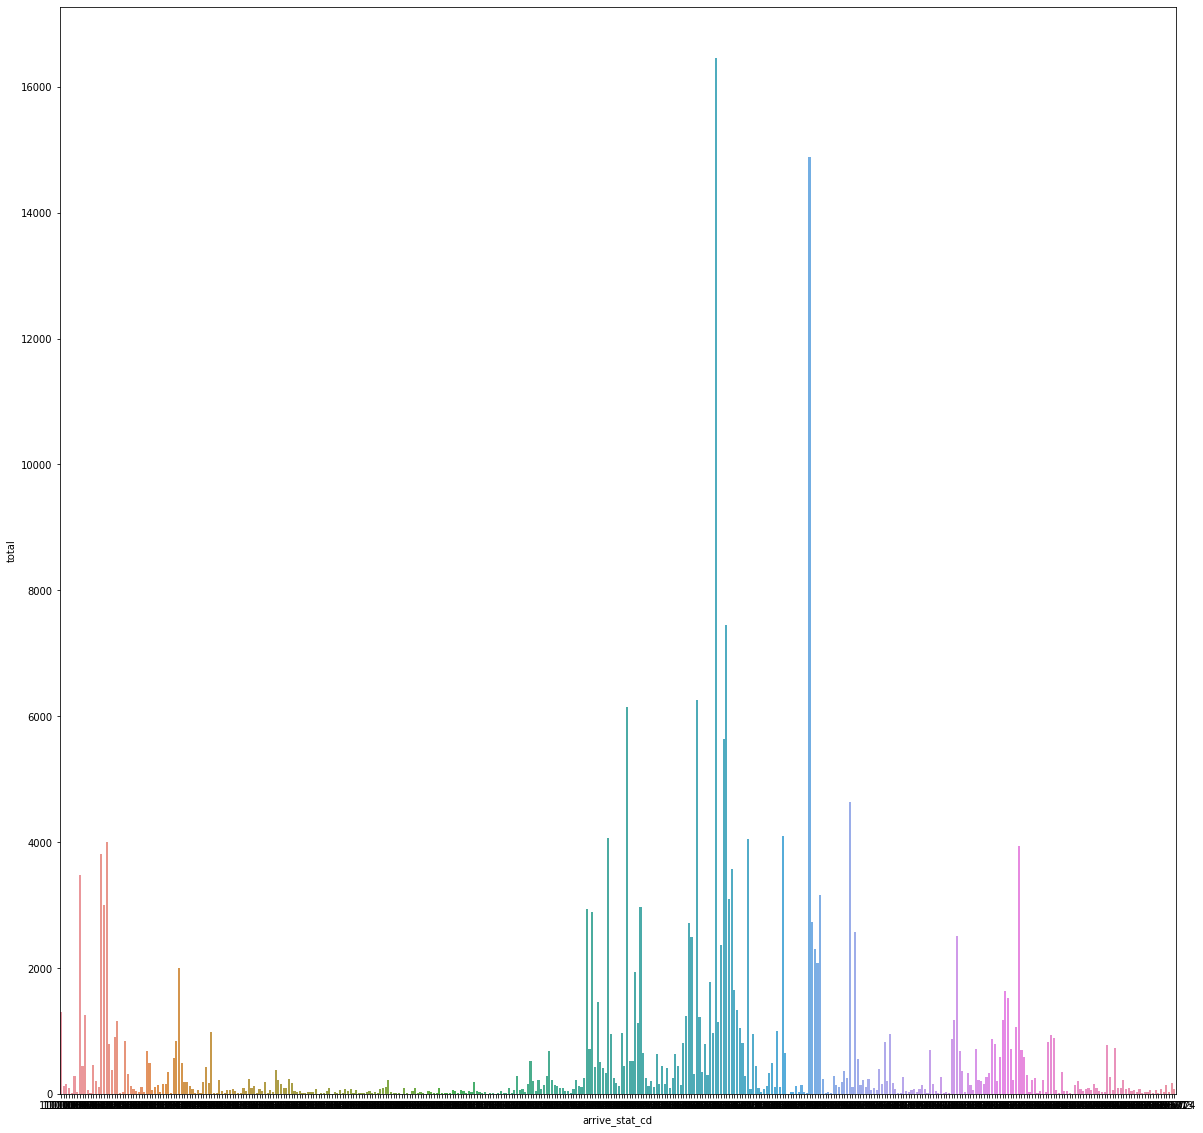

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20, 20))
sns.barplot(ax=ax, x=summation2['arrive_stat_cd'], y=summation2['total'])

In [ ]:
morethan3k = summation2.total > 3000
summation3 = summation2[morethan3k]
summation3

,arrive_stat_cd,total
7,1101061,3481.56
15,1102052,3815.94
16,1102054,3008.77
17,1102055,4009.16
204,1114066,4066.31
211,1114074,6145.02
237,1116054,6261.69
244,1116064,16449.47
247,1116067,5635.17
248,1116069,7448.48


In [ ]:
where_to_go = summation3.arrive_stat_cd.unique()

onlyfromgimpo = geo_gdf['stat_cd'].isin(where_to_go)
geogdf_gimpo = geo_gdf[onlyfromgimpo]
geogdf_gimpo

,stat_cd,geometry
8,1101061,"POLYGON ((126.97556 37.58968, 126.97596 37.589..."
17,1102052,"POLYGON ((126.97763 37.56580, 126.97769 37.565..."
18,1102054,"POLYGON ((126.98094 37.55385, 126.98089 37.553..."
19,1102055,"POLYGON ((126.97802 37.56564, 126.97789 37.565..."
214,1114066,"POLYGON ((126.94335 37.55460, 126.94333 37.554..."
221,1114074,"POLYGON ((126.89327 37.55817, 126.89327 37.558..."
243,1116054,"POLYGON ((126.84540 37.55785, 126.84525 37.557..."
251,1116064,"MULTIPOLYGON (((126.85264 37.57252, 126.85292 ..."
254,1116067,"MULTIPOLYGON (((126.83886 37.57371, 126.83902 ..."
256,1116069,"MULTIPOLYGON (((126.83886 37.57371, 126.83902 ..."


In [176]:
!pip freeze | grep folium

folium==0.8.3


In [ ]:
map = folium.Map(location=[37.4966965457217, 127.06281304835339], tiles='openstreetmap', zoom_start=12)

In [ ]:
folium.Choropleth(
    geo_data=geogdf_gimpo.__geo_interface__,
    data=summation3['total'],
    key_on="feature.id", 
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Gimpo Outbound (Midnight - 1:00AM)'
).add_to(map)

In [ ]:
map

In [ ]:
map.save('gimpo.html')

----
# 3-버스노선과 이동패턴의 비교

----
## 3.1-버스 노선 그리기(정류장 중심으로)

In [ ]:
busstops_url = 'https://datafile.seoul.go.kr/bigfile/iot/inf/nio_download.do?=&useCache=false'
post_body = {
    'infId': 'OA-1095',
    'seqNo': '',
    'seq': '7',
    'infSeq': '2'
}

In [ ]:
busstops_per_lines = requests.post(busstops_url, post_body)
busstops_per_lines.content

In [ ]:
with open('busstops_lines.xlsx', 'wb') as f:
    f.write(busstops_per_lines.content)

!ls -al

In [ ]:
lines_df = pd.read_excel('busstops_lines.xlsx')
lines_df.head()

In [ ]:
stops_gdf = gpd.GeoDataFrame(
    lines_df,
    geometry=gpd.points_from_xy(
        lines_df['X좌표'],
        lines_df['Y좌표'],
    )
)
stops_gdf.crs = {'init': 'epsg:4326'}
stops_gdf.head()

In [ ]:
from shapely.geometry import LineString


In [ ]:
# tmp = birds.groupby('tag-local-identifier')['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
lines = stops_gdf.groupby('노선명')['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
lines

----
## 3.2-지도 위에 표출하기

In [ ]:
import folium


In [ ]:
map = folium.Map(location=[37.4966965457217, 127.06281304835339], tiles='openstreetmap', zoom_start=12)

map

In [ ]:
for i, ln in lines.iterrows():

    points = ln.geometry.coords
    folium.PolyLine(
        points,
        color='red',
        weight=2
    ).add_to(map)

map

In [ ]:
# points = lines_gdf.loc[0].geometry.coords

# points

In [ ]:

# folium.PolyLine(
#     points,
#     color='red',
#     weight=2
# ).add_to(map)

# map

In [ ]:
from shapely.geometry import Point, Polygon

In [ ]:
print(stops_gdf.crs)

In [ ]:
sig_shp_url = 'http://www.gisdeveloper.co.kr/download/admin_shp/SIG_202101.zip'
sig_zip = requests.get(sig_shp_url)

with open('sig_shp.zip', 'wb') as f:
    f.write(sig_zip.content)

sig_data = gpd.read_file('sig_shp.zip', encoding='euc-kr')
sig_data

print(sig_data.crs)
sig_data = sig_data.to_crs(epsg=4326)
print(sig_data.crs)

In [ ]:
sig_data.head()

In [ ]:
gangnam_poly = sig_data[sig_data['SIG_KOR_NM'] == '김포시']
ax = gangnam_poly.plot(figsize=(8, 8), color='whitesmoke')


In [ ]:
gangnam_area = Polygon(gangnam_poly.geometry.iloc[0].exterior.coords)
gangnam_area

In [ ]:
the_line = stops_gdf[stops_gdf['노선명']=='340']

gangnam_poly = gangnam_poly.to_crs(epsg=4326)
ax = gangnam_poly.plot(figsize=(8, 8), color='whitesmoke', linestyle=':', edgecolor='black')
the_line.plot(ax=ax, color='blue')

In [ ]:
for i in range(len(the_line.geometry)):
    if gangnam_area.covers(the_line.geometry.iloc[i]):
        print('!!!!!!!!')


In [ ]:
points = lines[lines['노선명'] == '340'].iloc[0].geometry.coords
pointline = LineString(points)
pointline

In [ ]:
pointline.crosses(gangnam_area)

In [ ]:

for pt in points:

    p = Point(pt)

    if gangnam_area.contains(p):
        print("!=============!")

    if gangnam_area.covers(p):
        print('~~~~~~~~~~~~~~')



In [ ]:
lines_to_draw = []

for i in range(len(lines)):

    line_name = lines.iloc[i]['노선명']
    points = lines.iloc[i].geometry.coords
    for pt in points:
        p = Point(pt)

        if gangnam_area.contains(p):
            lines_to_draw.append(line_name)
            break
    else:
        print(f"{line_name} dropped")



In [ ]:
lines_to_draw

In [ ]:
import matplotlib.pyplot as plt

ax = gangnam_poly.plot(figsize=(30, 30), color='whitesmoke', linestyle=':', edgecolor='black')
# ax = only_seoul_df.plot(figsize=(10, 10), color='whitesmoke', linestyle=':', edgecolor='black')


for i in range(len(lines)):

    cur_line = lines.iloc[i]
    linename = cur_line['노선명']
    if linename not in lines_to_draw:
        continue

    x, y = cur_line['geometry'].xy
    plt.plot(x, y, c='red')

plt.show()


In [ ]:
# m_2 = folium.Map(location=[37.4966965457217, 127.06281304835339], tiles='openstreetmap', zoom_start=12)
m_2 = folium.Map(location=[37.4966965457217, 127.06281304835339], tiles='cartodbpositron', zoom_start=12)

m_2

In [ ]:
district_geo = gpd.GeoSeries(gangnam_poly['geometry']).simplify(tolerance=0.001)
district_gjson = district_geo.to_json()
folium.GeoJson(
    data=district_gjson,
    style_function=lambda x: {'fillColor': 'orange'}
).add_to(m_2)

m_2

In [ ]:
for _, row in lines.iterrows():

    linename = row['노선명']
    if linename not in lines_to_draw:
        continue

    simple_geo = gpd.GeoSeries(row['geometry']).simplify(tolerance=0.001)
    geojson = simple_geo.to_json()
    
    line_obj = folium.GeoJson(data=geojson)
    folium.Popup(linename).add_to(line_obj)

    line_obj.add_to(m_2)

m_2

### TODO: 노선별로 각각 지도를 그려야 겠다

----
## 3.3-인구이동을 지도위에 Choropleth Map으로 표출하기

### TODO: 시간대별 Choropelth Map에 하나의 노선도를 매핑하는 방식으로 지도 찍어내기